# NLP Project Workflow

1. **Read CSV Data**
   - Extract text features and labels from the dataset.

2. **Clean and Preprocess Text**
   - Convert text to lowercase.
   - Tokenize text into words.
   - Remove stopwords.

3. **Vectorize Text**
   - Convert text into sequences of numbers suitable for machine learning models.

4. **Encode Labels**
   - Convert categorical labels into numeric values.

5. **Get Final Dataset**
   - Features (X) and labels (y) are now ready for training a deep learning model.


In [1]:
import csv
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tabulate import tabulate  
import seaborn as sns
from collections import Counter

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("bbc-text.csv")

# Show basic info
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())

# Display dataframe in chunks of 10 rows neatly
def display_chunks_df(df, chunk_size=10):
    total_rows = len(df)
    for start in range(0, total_rows, chunk_size):
        end = start + chunk_size
        print(f"\nRows {start+1} to {min(end, total_rows)}:")
        display(df.iloc[start:end])  # This uses the Jupyter/Notebook display for proper DataFrame format

# Call the function
display_chunks_df(df, chunk_size=10)


Dataset shape: (2225, 2)

Column names: ['category', 'text']

Rows 1 to 10:


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...



Rows 11 to 20:


,category,text
10,entertainment,berlin cheers for anti-nazi film a german movi...
11,business,virgin blue shares plummet 20% shares in austr...
12,business,crude oil prices back above $50 cold weather a...
13,politics,hague given up his pm ambition former conser...
14,sport,moya emotional after davis cup win carlos moya...
15,business,s korean credit card firm rescued south korea ...
16,politics,howard backs stem cell research michael howard...
17,sport,connors boost for british tennis former world ...
18,business,japanese banking battle at an end japan s sumi...
19,tech,games maker fights for survival one of britain...



Rows 21 to 30:


,category,text
20,tech,security warning over fbi virus the us feder...
21,tech,halo 2 heralds traffic explosion the growing p...
22,sport,bates seals takeover ken bates has completed h...
23,sport,cole faces lengthy injury lay-off aston villa ...
24,tech,mobile audio enters new dimension as mobile ph...
25,sport,moya fights back for indian title carlos moya ...
26,entertainment,career honour for actor dicaprio actor leonard...
27,tech,mobile gig aims to rock 3g forget about going ...
28,politics,terror suspects face house arrest uk citizens ...
29,entertainment,halloween writer debra hill dies screenwriter ...



Rows 31 to 40:


,category,text
30,politics,royal couple watch nation s mood prince charle...
31,tech,firefox browser takes on microsoft microsoft s...
32,entertainment,celebrities get their skates on former england...
33,entertainment,show over for mtv s the osbournes rock star oz...
34,business,insurance bosses plead guilty another three us...
35,politics,sayeed to stand down as tory mp tory mp jonath...
36,tech,gamers snap up new sony psp gamers have bought...
37,entertainment,row threatens hendrix museum plan proposals to...
38,politics,debate needed on donations cap a cap on donat...
39,business,german growth goes into reverse germany s econ...



Rows 41 to 50:


,category,text
40,politics,labour targets hardcore truants a fresh crac...
41,sport,federer claims dubai crown world number one ro...
42,business,house prices show slight increase prices of ho...
43,sport,disappointed scott in solid start allan scott ...
44,tech,pandas benefit from wireless net the world s d...
45,entertainment,franz man seeks government help franz ferdinan...
46,politics,jamieson issues warning to bigots scotland s j...
47,politics,campaign cold calls questioned labour and th...
48,politics,england children s tsar appointed the first ch...
49,business,stock market eyes japan recovery japanese shar...



Rows 51 to 60:


,category,text
50,sport,lewsey puzzle over disallowed try england s jo...
51,politics,strike threat over pension plans millions of p...
52,business,standard life cuts policy bonuses standard lif...
53,business,pernod takeover talk lifts domecq shares in uk...
54,sport,rovers reject third ferguson bid blackburn hav...
55,politics,vouchers to cut winter deaths pensioners are...
56,business,ukraine trims privatisation check ukraine is t...
57,sport,henson stakes early lions claim the six nation...
58,sport,scotland v italy (sat) murrayfield edinburgh ...
59,business,us regulator to rule on pain drug us food and ...



Rows 61 to 70:


,category,text
60,business,telegraph newspapers axe 90 jobs the daily and...
61,sport,robinson wants dual code success england rugby...
62,business,court rejects $280bn tobacco case a us governm...
63,sport,hingis to make unexpected return martina hingi...
64,business,india power shares jump on debut shares in ind...
65,tech,broadband in the uk growing fast high-speed ne...
66,business,deadline nears for fiat-gm deal fiat and gener...
67,entertainment,top of the pops leaves bbc one the bbc s flags...
68,tech,microsoft gets the blogging bug software giant...
69,business,indonesia declines debt freeze indonesia no ...



Rows 71 to 80:


,category,text
70,politics,wales must learn health lessons the new heal...
71,business,singapore growth at 8.1% in 2004 singapore s e...
72,politics,parties build up poll war chests the labour pa...
73,sport,funding cut hits wales students the wales stud...
74,business,call to save manufacturing jobs the trades uni...
75,tech,tech helps disabled speed demons an organisati...
76,business,yukos sues four firms for $20bn russian oil fi...
77,sport,hodgson relishes european clashes former black...
78,sport,o driscoll out of scotland game ireland captai...
79,business,khodorkovsky ally denies charges a close assoc...



Rows 81 to 90:


,category,text
80,business,us company admits benin bribery a us defence a...
81,sport,coach ranieri sacked by valencia claudio ranie...
82,politics,straw praises kashmir moves the uk has welcome...
83,business,news corp makes $5.4bn fox offer news corporat...
84,entertainment,controversial film tops festival a controversi...
85,politics,hague given up his pm ambition former conser...
86,politics,uk pledges £1bn to vaccine effort uk chancello...
87,business,chinese dam firm defies beijing the china th...
88,entertainment,cult band kasabian surge forward indie dance b...
89,business,bank set to leave rates on hold uk interest ra...



Rows 91 to 100:


,category,text
90,sport,slovakia reach hopman cup final slovakia will ...
91,sport,solskjaer raises hopes of return manchester un...
92,politics,goldsmith: i was not leant on the attorney g...
93,sport,south africa sweep top awards south africa s s...
94,politics,amnesty chief laments war failure the lack of ...
95,sport,dent continues adelaide progress american tayl...
96,business,oil rebounds from weather effect oil prices re...
97,sport,ireland win eclipses refereeing errors the i...
98,business,japan narrowly escapes recession japan s econo...
99,entertainment,rapper kanye west s shrewd soul us hip-hop sta...



Rows 101 to 110:


,category,text
100,entertainment,housewives lift channel 4 ratings the debut of...
101,sport,mauresmo opens with victory in la amelie maure...
102,business,why few targets are better than many the econo...
103,politics,hague s six-figure earnings shown the rewards ...
104,politics,howard pitches for uk ethnic vote michael howa...
105,tech,loyalty cards idea for tv addicts viewers coul...
106,sport,mcclaren eyes uefa cup top spot steve mcclaren...
107,entertainment,lit idol begins search for author the second p...
108,sport,hong kong in 2011 world cup bid hong kong is h...
109,tech,web radio takes spanish rap global spin the ra...



Rows 111 to 120:


,category,text
110,business,us trade gap hits record in 2004 the gap betwe...
111,entertainment,rapper jay-z becomes label boss rap star jay-z...
112,sport,prodigy monfils blows away gaudio french prodi...
113,entertainment,berlin hails european cinema organisers say th...
114,sport,beckham relief as real go through david beckha...
115,entertainment,byrds producer melcher dies at 62 record produ...
116,entertainment,animation charms japan box office oscar-winnin...
117,politics,chancellor rallies labour voters gordon brown ...
118,sport,chelsea denied by james heroics a brave defens...
119,sport,chelsea sack mutu chelsea have sacked adrian m...



Rows 121 to 130:


,category,text
120,entertainment,slater to star in broadway play actor christia...
121,politics,jack cunningham to stand down veteran labour m...
122,business,safety alert as gm recalls cars the world s bi...
123,tech,screensaver tackles spam websites net users ar...
124,business,profits slide at india s dr reddy profits at i...
125,business,us crude prices surge above $53 us crude price...
126,tech,ibm frees 500 software patents computer giant ...
127,sport,benitez deflects blame from dudek liverpool ma...
128,politics,csa could close says minister ministers wou...
129,sport,williams battles to aussie title serena willia...



Rows 131 to 140:


,category,text
130,tech,seamen sail into biometric future the luxury c...
131,entertainment,film production falls 40% in uk the number o...
132,sport,wales get williams fitness boost wales are hop...
133,business,france telecom gets orange boost strong growth...
134,business,dollar hovers around record lows the us dollar...
135,tech,europe backs digital tv lifestyle how people r...
136,entertainment,hillbillies singer scoggins dies country and w...
137,tech,2d metal slug offers retro fun like some drill...
138,sport,safin relieved at aussie recovery marat safin ...
139,business,rich grab half colombia poor fund half of the ...



Rows 141 to 150:


,category,text
140,business,disaster claims less than $10bn insurers hav...
141,business,us seeks new $280bn smoker ruling the us justi...
142,tech,apple mac mini gets warm welcome the mac mini ...
143,sport,greene sets sights on world title maurice gree...
144,tech,blind student hears in colour a blind studen...
145,business,industrial output falls in japan japanese indu...
146,sport,clyde 0-5 celtic celtic brushed aside clyde to...
147,entertainment,bennett play takes theatre prizes the history ...
148,sport,moya emotional at davis cup win carlos moya de...
149,tech,the future in your pocket if you are a geek or...



Rows 151 to 160:


,category,text
150,sport,greek sprinters suspended by iaaf greek sprint...
151,tech,slim playstation triples sales sony playstatio...
152,politics,lib dems demand new inquiry a judge should loo...
153,business,german business confidence slides german busin...
154,tech,google s toolbar sparks concern search engine ...
155,entertainment,the comic book genius of stan lee stan lee th...
156,sport,lomu relishing return to action former all bla...
157,business,gm ford cut output as sales fall us car firms...
158,politics,uk firms embracing e-commerce uk firms are e...
159,business,orange colour clash set for court a row over t...



Rows 161 to 170:


,category,text
160,entertainment,goodrem wins top female mtv prize pop singer d...
161,politics,howard s unfinished business he s not finishe...
162,politics,custody death rate shocks mps deaths in cust...
163,entertainment,musical treatment for capra film the classic f...
164,politics,ukip candidate suspended eurosceptic party uki...
165,business,economy strong in election year uk businesse...
166,entertainment,springer criticises opera musical talk show ho...
167,politics,top judge clashes with ministers the uk s top ...
168,politics,blair dismisses quit claim report tony blair h...
169,entertainment,stars gear up for bafta ceremony film stars fr...



Rows 171 to 180:


,category,text
170,politics,fox attacks blair s tory lies tony blair lie...
171,sport,reds sink 10-man magpies titus bramble s own g...
172,business,australia rates at four year high australia is...
173,politics,commons hunt protest charges eight protesters ...
174,politics,mps to debate euthanasia laws mps are prepar...
175,business,chinese exports rise 25% in 2004 exports from ...
176,entertainment,carry on star patsy rowlands dies actress pats...
177,sport,gb quartet get cross country call four british...
178,business,yukos owner sues russia for $28bn the majority...
179,business,arsenal may seek full share listing arsenal ...



Rows 181 to 190:


,category,text
180,sport,keegan hails comeback king fowler manchester c...
181,tech,blogger grounded by her airline a us airline a...
182,sport,kenyon denies robben barca return chelsea chie...
183,tech,xbox power cable fire fear microsoft has sai...
184,tech,sony wares win innovation award sony has taken...
185,sport,almagro continues spanish surge unseeded nicol...
186,business,deutsche boerse set to woo lse bosses of deu...
187,sport,veteran martinez wins thai title conchita mart...
188,politics,mcconnell in drunk remark row scotland s fir...
189,entertainment,grammys honour soul star charles the memory of...



Rows 191 to 200:


,category,text
190,politics,kinnock to urge reform in lords neil kinnock h...
191,business,the ticking budget facing the us the budget ...
192,politics,blair said he would stand down tony blair pr...
193,business,french suitor holds lse meeting european stock...
194,tech,gizmondo gadget hits the shelves the gizmondo ...
195,politics,mp s shock at long lost daughter labour mp ste...
196,entertainment,versace art portfolio up for sale the art coll...
197,politics,lib dems predict best ever poll the lib dems...
198,tech,portable playstation ready to go sony s playst...
199,business,card fraudsters targeting web new safeguards...



Rows 201 to 210:


,category,text
200,sport,holmes feted with further honour double olympi...
201,business,profits stall at china s lenovo profits at chi...
202,sport,ferguson fears milan cutting edge manchester u...
203,tech,how to make a gigapixel picture the largest di...
204,entertainment,day-lewis set for berlin honour actor daniel d...
205,business,alfa romeos to get gm engines fiat is to sto...
206,politics,lib dems highlight problem debt people vulnera...
207,politics,blair to face trust issue head on tony blair s...
208,entertainment,public show for reynolds portrait sir joshua r...
209,sport,aragones angered by racism fine spain coach lu...



Rows 211 to 220:


,category,text
210,entertainment,lost doors frontman movie found historians in ...
211,politics,straw attacked on china arms moves to lift the...
212,sport,chepkemei joins edinburgh line-up susan chepke...
213,entertainment,douglas set for indian adventure actor michael...
214,sport,ireland v usa (sat) saturday 20 november lans...
215,sport,navratilova hits out at critics martina navrat...
216,entertainment,actor scott is new bond favourite bookmaker wi...
217,sport,hewitt falls to dent in adelaide lleyton hewit...
218,politics,new rules tackle sham weddings new rules on ...
219,politics,mps assess scots fishing industry a group of m...



Rows 221 to 230:


,category,text
220,entertainment,ray dvd beats box office takings oscar-nominat...
221,tech,world tour for top video gamers two uk gamers ...
222,sport,gardener battles to narrow win jason gardener ...
223,politics,no-one can define new hunt ban the new law ba...
224,business,eu-us seeking deal on air dispute the eu and u...
225,entertainment,fox too reliant on reality tv the head of us...
226,tech,learning to love broadband we are reaching the...
227,sport,all black magic: new zealand rugby playing col...
228,tech,tv s future down the phone line internet tv ha...
229,sport,france v wales (sat) stade de france paris s...



Rows 231 to 240:


,category,text
230,entertainment,tv show unites angolan families angolan famili...
231,politics,mrs howard gets key election role michael howa...
232,sport,reyes tricked into real admission jose antonio...
233,entertainment,comic morris returns with sitcom comedian chri...
234,tech,itunes user sues apple over ipod a user of app...
235,business,consumer spending lifts us growth us economic ...
236,tech,kenyan school turns to handhelds at the mbita ...
237,business,brewers profits lose their fizz heineken and ...
238,business,s&n extends indian beer venture the uk s bigge...
239,tech,concerns over windows atms cash machine networ...



Rows 241 to 250:


,category,text
240,business,retail sales show festive fervour uk retail sa...
241,sport,johnson edges out rival sotherton jade johnson...
242,business,china now top trader with japan china overtook...
243,sport,tindall wants second opinion england centre mi...
244,business,swiss cement firm in buying spree swiss cement...
245,sport,o connell rejects lions rumours ireland and mu...
246,entertainment,pupils to get anti-piracy lessons lessons on m...
247,business,steady job growth continues in us the us creat...
248,business,boeing unveils new 777 aircraft us aircraft fi...
249,entertainment,keanu reeves given hollywood star actor keanu ...



Rows 251 to 260:


,category,text
250,sport,wenger handed summer war chest arsenal boss ar...
251,sport,federer joins all-time greats the last year ha...
252,politics,ukip candidate suspended in probe eurosceptic ...
253,tech,first look at playstation 3 chip some details ...
254,politics,crucial decision on super-casinos a decision o...
255,politics,mps criticise child access system divorced par...
256,politics,lib dems new election pr chief the lib dems h...
257,tech,sporting rivals go to extra time the current s...
258,sport,italy 8-38 wales wales secured their first awa...
259,tech,podcasters look to net money nasa is doing it...



Rows 261 to 270:


,category,text
260,politics,ukip outspent labour on eu poll the uk indepen...
261,business,burren awarded egyptian contracts british ener...
262,tech,digital uk driven by net and tv the uk s adopt...
263,entertainment,ten-year tragedy of missing manic richey edwar...
264,tech,tough rules for ringtone sellers firms that fl...
265,sport,davenport hits out at wimbledon world number o...
266,sport,wolves appoint hoddle as manager glenn hoddle ...
267,business,cairn energy in indian gas find shares in cair...
268,business,ex-boeing director gets jail term an ex-chief ...
269,politics,tories reject rethink on axed mp sacked mp how...



Rows 271 to 280:


,category,text
270,business,building giant in asbestos payout australian b...
271,tech,apple unveils low-cost mac mini apple has un...
272,sport,soderling wins tense milan final fifth seed ro...
273,entertainment,us critics laud comedy sideways road trip come...
274,sport,cudicini misses carling cup final chelsea goal...
275,politics,report attacks defence spending the ministry o...
276,tech,halo 2 sells five million copies microsoft is ...
277,entertainment,band aid retains number one spot the charity s...
278,business,soaring oil hits world economy the soaring c...
279,sport,paris promise raises welsh hopes has there bee...



Rows 281 to 290:


,category,text
280,entertainment,levy takes whitbread novel prize orange prize ...
281,sport,thanou bullish over drugs hearing katerina tha...
282,tech,consumers snub portable video consumers want...
283,politics,plan to give elderly care control elderly and ...
284,tech,anti-tremor mouse stops pc shakes a special ad...
285,business,nissan names successor to ghosn nissan has nam...
286,business,us firm bids for lacroix label a us firm has...
287,politics,peers debate crown succession law peers are de...
288,politics,brown targets oaps and homebuyers gordon brown...
289,sport,sydney to host north v south game sydney will ...



Rows 291 to 300:


,category,text
290,business,yukos seeks court action on sale yukos will re...
291,tech,freeze on anti-spam campaign a campaign by lyc...
292,entertainment,christmas song formula unveiled a formula for...
293,politics,tory stalking horse meyer dies sir anthony m...
294,tech,china net cafe culture crackdown chinese autho...
295,business,bush to outline toughest budget president bu...
296,entertainment,cage film s third week at us top nicolas cage ...
297,sport,pountney handed ban and fine northampton coach...
298,entertainment,bafta to hand out movie honours movie stars fr...
299,sport,ireland surge past scots ireland maintained th...



Rows 301 to 310:


,category,text
300,entertainment,stars pay tribute to actor davis hollywood sta...
301,politics,fox attacks blair s tory lies tony blair lie...
302,business,quiksilver moves for rossignol shares of skis ...
303,sport,dallaglio eyeing lions tour place former engla...
304,business,india s rupee hits five-year high india s rupe...
305,sport,faultless federer has no equal roger federer -...
306,sport,young debut cut short by ginepri fifteen-year-...
307,entertainment,top gig award for scissor sisters new york ban...
308,sport,ruddock backs yapp s credentials wales coach m...
309,politics,iraq advice claim sparks new row the tories sa...



Rows 311 to 320:


,category,text
310,politics,mps issued with blackberry threat mps will be ...
311,business,lacroix label bought by us firm luxury goods g...
312,entertainment,incredibles win animation awards the incredibl...
313,tech,speech takes on search engines a scottish firm...
314,business,two nigerian banks set to merge nigerian banks...
315,sport,white prepared for battle tough-scrummaging pr...
316,business,takeover offer for sunderland fc bob murray c...
317,entertainment,uk debut for kevin spacey movie hollywood star...
318,business,uk bank seals south korean deal uk-based bank ...
319,business,business fears over sluggish eu economy as eur...



Rows 321 to 330:


,category,text
320,business,madagascar completes currency switch madagasca...
321,politics,blair says mayor should apologise tony blair h...
322,business,bank opts to leave rates on hold the bank of e...
323,politics,blunkett hints at election call ex-home secret...
324,entertainment,dj double act revamp chart show dj duo jk and ...
325,entertainment,bbc to pour £9m into new comedy the bbc is to ...
326,business,consumers drive french economy france s econom...
327,sport,nadal marches on in mexico rafael nadal contin...
328,business,india s deccan gets more planes air deccan has...
329,politics,blair up for it ahead of poll tony blair say...



Rows 331 to 340:


,category,text
330,business,yangtze electric s profits double yangtze elec...
331,tech,cebit fever takes over hanover thousands of pr...
332,entertainment,jarre joins fairytale celebration french music...
333,business,ecb holds rates amid growth fears the european...
334,sport,melzer shocks agassi second seed andre agassi ...
335,sport,white admits to balco drugs link banned americ...
336,entertainment,britney attacks false tabloids pop star brit...
337,business,yukos heading back to us courts russian oil an...
338,business,aids and climate top davos agenda climate chan...
339,politics,russian ex-spy on hunger strike an ex-russian ...



Rows 341 to 350:


,category,text
340,tech,looks and music to drive mobiles mobile phones...
341,entertainment,u2 s desire to be number one u2 who have won ...
342,tech,web photo storage market hots up an increasing...
343,politics,blair returns from peace mission prime ministe...
344,business,senior fannie mae bosses resign the two most s...
345,sport,clijsters could play aussie open kim clijsters...
346,politics,visa decision every 11 minutes visa processi...
347,business,healthsouth ex-boss goes on trial the former h...
348,entertainment,rapper 50 cent ends protege feud rapper 50 cen...
349,tech,speak easy plan for media players music and fi...



Rows 351 to 360:


,category,text
350,entertainment,sky takes over oscar night mantle sky has sign...
351,tech,new consoles promise big problems making games...
352,politics,councils prepare to set tax rises council tax ...
353,sport,pearce keen on succeeding keegan joint assista...
354,entertainment,neeson in bid to revive theatre hollywood film...
355,business,eu too slow on economic reforms most eu coun...
356,politics,green fear for transport ballot the green part...
357,business,market unfazed by aurora setback as the aurora...
358,business,iraq to invite phone licence bids iraq is to i...
359,politics,baa support ahead of court battle uk airport o...



Rows 361 to 370:


,category,text
360,sport,henman & murray claim lta awards tim henman wa...
361,tech,us woman sues over cartridges a us woman is su...
362,business,japanese growth grinds to a halt growth in jap...
363,business,nortel in $300m profit revision telecoms equip...
364,entertainment,bangkok film festival battles on organisers of...
365,entertainment,sideways dominates spirit awards the comedy si...
366,tech,mobile multimedia slow to catch on there is no...
367,sport,safin slumps to shock dubai loss marat safin s...
368,business,emi shares hit by profit warning shares in mus...
369,entertainment,eminem beats elvis to number one rapper eminem...



Rows 371 to 380:


,category,text
370,tech,text messages aid disaster recovery text messa...
371,tech,us peer-to-peer pirates convicted the first co...
372,entertainment,u2 to play at grammy awards show irish rock ba...
373,entertainment,aviator creator in oscars snub the man who s...
374,entertainment,baywatch dubbed worst tv import surf show ba...
375,politics,election deal faltered over heath role the tor...
376,sport,iaaf will contest greek decision the internati...
377,politics,top tories on lib dem hit list the liberal d...
378,tech,parents face video game lessons ways of ensuri...
379,business,mcdonald s boss bell dies aged 44 charlie bell...



Rows 381 to 390:


,category,text
380,entertainment,stallone evicted from big brother jackie stall...
381,politics,e-university disgraceful waste a failed gove...
382,business,argentina venezuela in oil deal argentina and...
383,entertainment,brando rejected godfather role late film sta...
384,politics,drive to save festive holidays efforts are b...
385,politics,ukip s secret weapon by any measure new york...
386,sport,wright-phillips to start on right england coac...
387,sport,roddick into san jose final andy roddick will ...
388,business,dollar hits new low versus euro the us dollar ...
389,politics,will tory tax cuts lift spirits michael howar...



Rows 391 to 400:


,category,text
390,entertainment,joy division story to become film the life of ...
391,business,industrial revival hope for japan japanese ind...
392,sport,robinson answers critics england captain jason...
393,business,markets signal brazilian recovery the brazilia...
394,business,india widens access to telecoms india has rais...
395,sport,holmes is hit by hamstring injury kelly holmes...
396,business,tsunami to hit sri lanka banks sri lanka s b...
397,politics,lawyer attacks anti-terror laws a senior barri...
398,politics,burglar defence guidelines issued householders...
399,politics,lib dems bold election policy charles kenne...



Rows 401 to 410:


,category,text
400,sport,double injury blow strikes wales wales centre ...
401,tech,progress on new internet domains by early 2005...
402,tech,warnings about junk mail deluge the amount of ...
403,business,russian oil merger excludes yukos the merger o...
404,tech,bt boosts its broadband packages british telec...
405,sport,o gara revels in ireland victory ireland fly-h...
406,entertainment,berlin honours s korean director south korean ...
407,business,bush to get tough on deficit us president ge...
408,politics,terror powers expose tyranny the lord chance...
409,business,eu aiming to fuel development aid european uni...



Rows 411 to 420:


,category,text
410,entertainment,bollywood dvd fraudster is jailed a major dist...
411,business,dutch bank to lay off 2 850 staff abn amro th...
412,politics,blair labour s longest-serving pm tony blair h...
413,entertainment,artists secret postcards on sale postcards by...
414,politics,brown and blair face new rift claims for the u...
415,business,wmc profits up amid bid criticism australian m...
416,tech,microsoft releases patches microsoft has warne...
417,business,firms pump billions into pensions employers ha...
418,sport,mirza makes indian tennis history teenager san...
419,sport,celtic unhappy over bulgaria date martin o nei...



Rows 421 to 430:


,category,text
420,business,small firms hit by rising costs rising fuel ...
421,sport,spurs to sign iceland u21 star tottenham are p...
422,sport,scots suffer another injury blow scotland s ba...
423,entertainment,little britain two top comic list little brita...
424,sport,strachan turns down pompey former southampton ...
425,sport,england coach faces rap after row england coac...
426,sport,bortolami predicts dour contest italy skipper ...
427,tech,microsoft takes on desktop search microsoft ha...
428,business,china suspends 26 power projects china has ord...
429,business,venezuela identifies idle farms venezuelan a...



Rows 431 to 440:


,category,text
430,business,s korea spending boost to economy south korea ...
431,politics,blair backs pre-election budget tony blair h...
432,sport,england 17-18 france england suffered an eight...
433,sport,benitez issues warning to gerrard liverpool ma...
434,business,s korean lender faces liquidation creditors of...
435,tech,mac mini heralds mini revolution the mac mini ...
436,business,slowdown hits us factory growth us industrial ...
437,politics,whitehall shredding increasing - tories civil ...
438,sport,sa return to mauritius top seeds south africa ...
439,politics,lib dems to target stamp duty the liberal de...



Rows 441 to 450:


,category,text
440,tech,lasers help bridge network gaps an indian tele...
441,business,news corp eyes video games market news corp t...
442,sport,scotland 18-10 italy six chris paterson penalt...
443,entertainment,levy tipped for whitbread prize novelist andre...
444,business,peugeot deal boosts mitsubishi struggling japa...
445,politics,hunt ban support is in decline support for a...
446,tech,broadband challenges tv viewing the number of ...
447,business,weak data buffets french economy a batch of do...
448,sport,collins calls for chambers return world 100m c...
449,business,nasdaq planning $100m-share sale the owner of ...



Rows 451 to 460:


,category,text
450,politics,labour in constituency race row labour s choic...
451,business,mg rover china tie-up delayed mg rover s pro...
452,business,ask jeeves tips online ad revival ask jeeves h...
453,sport,preview: ireland v england (sun) lansdowne roa...
454,entertainment,tv station refuses adoption show a tv station ...
455,tech,uk net users leading tv downloads british tv v...
456,politics,boothroyd calls for lords speaker betty boothr...
457,tech,podcasts mark rise of diy radio an apple ipod ...
458,business,india s reliance family feud heats up the ongo...
459,sport,fuming robinson blasts officials england coach...



Rows 461 to 470:


,category,text
460,business,monsanto fined $1.5m for bribery the us agroch...
461,entertainment,poppins musical gets flying start the stage ad...
462,tech,musical future for phones analyst bill thompso...
463,tech,dozens held over id fraud site twenty-eight pe...
464,business,metlife buys up citigroup insurer us banking g...
465,sport,philippoussis doubt over open bid mark philipp...
466,sport,healey targets england comeback leicester wing...
467,entertainment,dirty den s demise seen by 14m more than 14 mi...
468,politics,guantanamo four free in weeks all four britons...
469,politics,howard attacks cost of asylum michael howard h...



Rows 471 to 480:


,category,text
470,politics,citizenship event for 18s touted citizenship c...
471,sport,parry puts gerrard above money listen to the...
472,politics,anti-terror plan faces first test plans to all...
473,tech,broadband steams ahead in the us more and more...
474,tech,nintendo adds media playing to ds nintendo is ...
475,entertainment,prince crowned top music earner prince earne...
476,politics,new foot and mouth action urged a senior tory ...
477,tech,britons fed up with net service a survey condu...
478,entertainment,rap feud in 50 cent s g-unit crew us rap star ...
479,business,train strike grips buenos aires a strike on th...



Rows 481 to 490:


,category,text
480,sport,edwards tips idowu for euro gold world outdoor...
481,sport,thomas out of six nations wales captain gareth...
482,tech,losing yourself in online gaming online role p...
483,business,mixed reaction to man utd offer shares in manc...
484,sport,lewis-francis eyeing world gold mark lewis-fra...
485,sport,hantuchova in dubai last eight daniela hantuch...
486,politics,kennedy looks to election gains they may not k...
487,sport,wolves appoint hoddle as manager glenn hoddle ...
488,sport,pavey focuses on indoor success jo pavey will ...
489,business,cairn shares slump on oil setback shares in ca...



Rows 491 to 500:


,category,text
490,sport,giggs handed wales leading role ryan giggs wil...
491,entertainment,new york rockers top talent poll new york elec...
492,tech,sony psp tipped as a must-have sony s playst...
493,politics,brown outlines third term vision gordon brown ...
494,sport,arnesen denies rift with santini tottenham spo...
495,politics,thousands join strike in wales thousands of ci...
496,tech,microsoft gets the blogging bug software giant...
497,business,putin backs state grab for yukos russia s pres...
498,business,g7 backs africa debt relief plan g7 finance mi...
499,business,argentina closes $102.6bn debt swap argentina ...



Rows 501 to 510:


,category,text
500,tech,global digital divide narrowing the digital...
501,business,axa sun life cuts bonus payments life insurer ...
502,business,kraft cuts snack ads for children kraft plans ...
503,sport,greek duo cleared in doping case sprinters kos...
504,sport,kerr frustrated at victory margin republic of ...
505,sport,gallas sees two-horse race chelsea s william g...
506,sport,chelsea clinch cup in extra-time (after extra-...
507,business,gm in crunch talks on fiat future fiat will me...
508,tech,when invention turns to innovation it is unlik...
509,entertainment,dutch watch van gogh s last film the last film...



Rows 511 to 520:


,category,text
510,sport,davenport hits out at wimbledon world number o...
511,sport,big guns ease through in san jose top-seeded a...
512,tech,digital guru floats sub-$100 pc nicholas negro...
513,business,brazil buy boosts belgium s inbev belgian brew...
514,tech,net regulation still possible the blurring o...
515,entertainment,india to deport bollywood actress india has or...
516,politics,labour mp praises tory campaign the conservati...
517,sport,ireland 17-12 south africa ronan o gara scored...
518,business,yukos drops banks from court bid russian oil c...
519,politics,no to royal succession shake-up a labour peer ...



Rows 521 to 530:


,category,text
520,business,fiat chief takes steering wheel the chief exec...
521,tech,bt offers free net phone calls bt is offering ...
522,tech,mobiles double up as bus tickets mobiles could...
523,politics,tory leader cleared over work scottish conse...
524,tech,disney backs sony dvd technology a next genera...
525,business,air jamaica back in state control the jamaican...
526,sport,mourinho defiant on chelsea form chelsea boss ...
527,business,bank payout to pinochet victims a us bank has ...
528,entertainment,us charity anthem is re-released we are the wo...
529,sport,newcastle line up babayaro newcastle manager g...



Rows 531 to 540:


,category,text
530,politics,labour s core support takes stock tony blair h...
531,entertainment,rapper films music video in jail a us rapper a...
532,sport,england s defensive crisis grows england s def...
533,sport,campbell to extend sprint career darren campbe...
534,politics,scots smoking ban details set out smoke-free a...
535,tech,pc ownership to double by 2010 the number of...
536,entertainment,itunes now selling band aid song ipod owners c...
537,tech,santy worm makes unwelcome visit thousands of ...
538,sport,radcliffe eyes hard line on drugs paula radcli...
539,politics,more to do on adult literacy the government w...



Rows 541 to 550:


,category,text
540,business,bank holds interest rate at 4.75% the bank of ...
541,entertainment,mumbai bombs movie postponed the release of a ...
542,politics,act on detention ruling uk urged the governme...
543,business,economy strong in election year uk businesse...
544,entertainment,bening makes awards breakthrough film actress ...
545,sport,rusedski forced out in marseille greg rusedski...
546,sport,radcliffe enjoys winning comeback paula radcli...
547,tech,ink helps drive democracy in asia the kyrgyz r...
548,politics,lib dems unveil women s manifesto the liberal ...
549,entertainment,berlin celebrates european cinema organisers s...



Rows 551 to 560:


,category,text
550,politics,labour accused of broken pledge labour has alr...
551,entertainment,casino royale is next bond movie casino royale...
552,politics,the memory driving brown s mission the memory ...
553,tech,games win for blu-ray dvd format the next-gene...
554,politics,bnp leader nick griffin arrested the leader of...
555,entertainment,the sound of music is coming home the original...
556,sport,barbarians 19-47 new zealand new zealand prove...
557,business,us bank boss hails genius smith us federal r...
558,sport,mcilroy continues winning streak james mcilroy...
559,entertainment,box office blow for alexander director oliver ...



Rows 561 to 570:


,category,text
560,sport,candela completes bolton switch bolton boss sa...
561,entertainment,totp turns to elvis impersonator top of the po...
562,tech,cable offers video-on-demand cable firms ntl a...
563,business,saab to build cadillacs in sweden general moto...
564,sport,dawson set for new wasps contract european cha...
565,politics,howard attacks pay later budget tory leader ...
566,entertainment,spark heads world booker list dame muriel spar...
567,politics,brown hits back in blair rift row gordon brown...
568,entertainment,singer s film to show at festival a documentar...
569,entertainment,shark tale dvd is us best-seller oscar-nominat...



Rows 571 to 580:


,category,text
570,entertainment,us actor found with gun residue actor robert...
571,politics,tories urge change at the top tory delegates...
572,entertainment,russian film wins bbc world prize russian dram...
573,tech,how to smash a home computer an executive who ...
574,politics,blair says uk tsunami aid to soar tony blair h...
575,tech,movie body hits peer-to-peer nets the movie in...
576,tech,robots learn robotiquette rules robots are l...
577,sport,hearts of oak 3-2 cotonsport hearts of oak set...
578,sport,isinbayeva heads for birmingham olympic pole v...
579,tech,playstation 3 chip to be unveiled details of t...



Rows 581 to 590:


,category,text
580,tech,napster offers rented music to go music downlo...
581,sport,reaction from spanish press england s 1-0 defe...
582,entertainment,ray dvd beats box office takings oscar-nominat...
583,entertainment,triple triumph for little britain top tv cult ...
584,sport,fa decides not to punish mourinho the football...
585,tech,football manager scores big time for the past ...
586,entertainment,tautou to star in da vinci film french actre...
587,sport,kluft impressed by sotherton form olympic hept...
588,sport,mourinho takes swipe at arsenal chelsea boss j...
589,tech,broadband fuels online change fast web access ...



Rows 591 to 600:


,category,text
590,business,ba to suspend two saudi services british airwa...
591,politics,david blunkett in quotes david blunkett - who ...
592,tech,china ripe for media explosion asia is set t...
593,business,share boost for feud-hit reliance the board of...
594,sport,roche turns down federer offer australian te...
595,entertainment,branson show flops on us screens entrepreneur ...
596,sport,wilkinson return unlikely jonny wilkinson lo...
597,entertainment,dvd review: harry potter and the prisoner of a...
598,politics,teenagers to be allowed to be mps teenagers wi...
599,tech,anti-spam screensaver scrapped a contentious c...



Rows 601 to 610:


,category,text
600,entertainment,snow patrol feted at irish awards snow patrol ...
601,entertainment,new harry potter tops book chart harry potter ...
602,business,pension hitch for long-living men male life ex...
603,entertainment,sir paul rocks super bowl crowds sir paul mcca...
604,entertainment,da vinci code is lousy history the plot of a...
605,sport,parry firm over gerrard listen to the full int...
606,tech,court mulls file-sharing future judges at the ...
607,tech,swap offer for pirated windows xp computer gia...
608,politics,probe launched on ken nazi jibe an investigati...
609,sport,england given tough sevens draw england will h...



Rows 611 to 620:


,category,text
610,tech,broadband fuels online expression fast web acc...
611,sport,bosvelt optimistic over new deal manchester ci...
612,politics,profile: gordon brown the ultimate prize of 10...
613,politics,student fee factor played down a rise has be...
614,entertainment,spears seeks aborted tour payment singer britn...
615,tech,gadgets galore on show at fair the 2005 consum...
616,business,uk interest rates held at 4.75% the bank of en...
617,tech,rivals of the £400 apple... the mac mini is th...
618,tech,search wars hit desktop pcs another front in t...
619,tech,virgin radio offers 3g broadcast uk broadcaste...



Rows 621 to 630:


,category,text
620,business,israel looks to us for bank chief israel has a...
621,politics,ministers naive over phone-taps the governme...
622,politics,voters don t trust politicians eight out of ...
623,sport,bryan twins keep us hopes alive the united sta...
624,tech,games enter the classroom video games could so...
625,business,nigeria to boost cocoa production the governme...
626,business,businesses fail to plan for hiv companies fail...
627,entertainment,portishead back after eight years cult british...
628,entertainment,volcano drama erupts on bbc one supervolcano ...
629,sport,parmar ruled out of davis cup tie a knee injur...



Rows 631 to 640:


,category,text
630,tech,putting a face to big brother literally putt...
631,business,dollar gains on greenspan speech the dollar ha...
632,tech,us woman sues over ink cartridges a us woman i...
633,entertainment,gallery unveils interactive tree a christmas t...
634,sport,mutu to hold talks with juventus disgraced for...
635,tech,more power to the people says hp the digital r...
636,politics,end bush denial blair tells eu tony blair is...
637,tech,nintendo ds makes its euro debut nintendo s ds...
638,politics,could rivalry overshadow election tony blair ...
639,business,asia shares defy post-quake gloom thailand has...



Rows 641 to 650:


,category,text
640,politics,conservative backing for id cards the tories a...
641,politics,kennedy predicts bigger turnout voters pent ...
642,business,borussia dortmund near bust german football cl...
643,sport,rusedski angry over supplements greg rusedski ...
644,tech,rings of steel combat net attacks gambling is ...
645,sport,mcclaren targets champions league middlesbroug...
646,tech,gritty return for prince of persia still baski...
647,politics,straw backs ending china embargo uk foreign se...
648,entertainment,robots march to us cinema summit animated movi...
649,tech,mobile networks seek turbo boost third-generat...



Rows 651 to 660:


,category,text
650,sport,wales silent on grand slam talk rhys williams ...
651,entertainment,wife swap makers sue us copycat the british ...
652,tech,supercomputer breaks speed record the us is po...
653,sport,lennon brands rangers favourites celtic s neil...
654,politics,asylum children to face returns the uk governm...
655,entertainment,eminem secret gig venue revealed rapper eminem...
656,sport,munster cup tie switched to spain munster s he...
657,tech,freeze on anti-spam campaign a campaign by lyc...
658,sport,kirwan demands italy consistency italy coach j...
659,sport,beckham rules out management move real madrid ...



Rows 661 to 670:


,category,text
660,politics,uk needs tax cuts tories insist a major chang...
661,entertainment,vibe awards back despite violence the us vibe ...
662,business,russia wto talks make progress talks on russ...
663,politics,muslim police stops more likely uk muslims s...
664,entertainment,no uk premiere for rings musical the producers...
665,business,uk risks breaking golden rule the uk governm...
666,business,steady job growth continues in us the us creat...
667,tech,dvd copy protection strengthened dvds will be ...
668,business,sec to rethink post-enron rules the us stock m...
669,entertainment,double win for sea inside spanish movie the se...



Rows 671 to 680:


,category,text
670,tech,dvd copy protection strengthened dvds will be ...
671,sport,2004: an irish athletics year 2004 won t be re...
672,tech,microsoft plans safer id system microsoft is...
673,politics,msps hear renewed climate warning climate chan...
674,tech,the pirates with no profit motive two men who ...
675,politics,kilroy launches veritas party ex-bbc chat sh...
676,business,ukraine steel sell-off illegal the controver...
677,politics,minimum wage increased to £5.05 the minimum wa...
678,entertainment,oscar host rock to keep it clean oscar host ch...
679,sport,davenport puts retirement on hold lindsay dave...



Rows 681 to 690:


,category,text
680,business,buyers snap up jet airways shares investors h...
681,business,winter freeze keeps oil above $50 oil prices c...
682,business,europe blames us over weak dollar european lea...
683,entertainment,celebrities get to stay in jungle all four con...
684,sport,mido makes third apology ahmed mido hossam h...
685,business,iraq and afghanistan in wto talks the world tr...
686,entertainment,musical treatment for capra film the classic f...
687,entertainment,landmark movies of 2004 hailed us film profes...
688,sport,lions blow to world cup winners british and ir...
689,entertainment,vera drake scoops film award oscar hopefuls mi...



Rows 691 to 700:


,category,text
690,politics,mp attacked by muggers in kenya an mp has had ...
691,politics,economy focus for election battle britain s ec...
692,politics,uk troops on ivory coast standby downing stree...
693,sport,lewis-francis turns to christie mark lewis-fra...
694,sport,holmes urged to compete at worlds jolanda cepl...
695,sport,isinbayeva claims new world best pole vaulter ...
696,tech,yahoo moves into desktop search internet giant...
697,politics,tory leader urges harry apology prince harry s...
698,sport,britain boosted by holmes double athletics fan...
699,politics,eu china arms ban to be lifted the eu embarg...



Rows 701 to 710:


,category,text
700,politics,blunkett unveils policing plans people could b...
701,tech,peer-to-peer nets here to stay peer-to-peer ...
702,politics,escaped prisoner report ordered first minister...
703,sport,owen set for skipper role wales number eight m...
704,business,newest eu members underpin growth the european...
705,entertainment,eastenders is set for us remake plans to cre...
706,sport,ireland 21-19 argentina an injury-time dropped...
707,business,m&s cuts prices by average of 24% marks & spen...
708,business,lloyd s of london head chides fsa the head of ...
709,tech,sun offers processing by the hour sun microsys...



Rows 711 to 720:


,category,text
710,business,criminal probe on citigroup deals traders at u...
711,entertainment,willis sues over movie injury actor bruce wi...
712,entertainment,blue beat u2 to top france honour irish band u...
713,entertainment,music man to the oscars bill conti s job of mu...
714,business,amex shares up on spin-off news shares in amer...
715,entertainment,lee to create new film superhero comic book ve...
716,entertainment,fantasy book wins hollywood deal a british aut...
717,politics,child access laws shake-up parents who refuse ...
718,tech,apple attacked over sources row civil libertie...
719,business,india calls for fair trade rules india which ...



Rows 721 to 730:


,category,text
720,sport,hansen delays return until 2006 british trip...
721,tech,no re-draft for eu patent law a proposed euro...
722,sport,rochus shocks coria in auckland top seed guill...
723,sport,weir poised for sunderland move larne s teenag...
724,politics,tory expert denies defeat warning the conserva...
725,business,vw considers opening indian plant volkswagen i...
726,sport,merritt close to indoor 400m mark teenager las...
727,tech,anti-spam laws bite spammer hard the net s sel...
728,business,oil prices fall back from highs oil prices ret...
729,sport,mansfield 0-1 leyton orient an second-half goa...



Rows 731 to 740:


,category,text
730,tech,eu software patent law delayed controversial n...
731,sport,wood - ireland can win grand slam former capta...
732,sport,gb select holmes for double bid kelly holmes h...
733,entertainment,comeback show for friends star friends actres...
734,sport,minister digs in over doping row the belgian s...
735,business,bad weather hits nestle sales a combination of...
736,sport,o sullivan keeps his powder dry when you are g...
737,business,ge sees excellent world economy us behemoth ...
738,tech,us duo in first spam conviction a brother and ...
739,politics,labour s election love-in peace and love have ...



Rows 741 to 750:


,category,text
740,tech,spam e-mails tempt net shoppers computer users...
741,business,electrolux to export europe jobs electrolux sa...
742,sport,ref stands by scotland decisions the referee f...
743,sport,gerrard plays down european hopes steven gerra...
744,business,wal-mart fights back at accusers two big us na...
745,business,china continues breakneck growth china s econo...
746,business,air china in $1bn london listing china s natio...
747,business,us ahold suppliers face charges us prosecutors...
748,politics,tv debate urged for party chiefs broadcasters ...
749,sport,el guerrouj targets cross country double olymp...



Rows 751 to 760:


,category,text
750,business,s korean consumers spending again south korea ...
751,tech,us blogger fired by her airline a us airline a...
752,business,fbi agent colludes with analyst a former fbi a...
753,sport,italy aim to rattle england italy coach john k...
754,politics,guantanamo man suing government a british te...
755,business,us to rule on yukos refuge call yukos has said...
756,tech,hotspot users gain free net calls people using...
757,business,qwest may spark mci bidding war us phone compa...
758,sport,greek pair attend drugs hearing greek sprinter...
759,business,gm pays $2bn to evade fiat buyout general moto...



Rows 761 to 770:


,category,text
760,politics,kilroy-silk attacked with slurry euro mp rober...
761,entertainment,oscars steer clear of controversy the oscars n...
762,sport,celtic make late bid for bellamy newcastle str...
763,business,shares rise on new man utd offer shares in man...
764,politics,blunkett tells of love and pain david blunkett...
765,business,lufthansa flies back to profit german airline ...
766,entertainment,applegate s charity show closes us musical swe...
767,business,lse doubts boost bidders shares shares in deu...
768,business,us insurer marsh cuts 2 500 jobs up to 2 500 j...
769,business,european losses hit gm s profits general motor...



Rows 771 to 780:


,category,text
770,sport,prop jones ready for hard graft adam jones say...
771,politics,opposition grows to house arrests the conserva...
772,entertainment,redford s vision of sundance despite sporting ...
773,sport,blackburn v burnley ewood park tuesday 1 mar...
774,politics,uk needs true immigration data a former home...
775,sport,london hope over chepkemei london marathon org...
776,politics,talks aim to avert pension strike talks aimed ...
777,politics,eu fraud clampdown urged eu member states are ...
778,business,s korea spending boost to economy south korea ...
779,business,cuba winds back economic clock fidel castro s ...



Rows 781 to 790:


,category,text
780,sport,london irish 19-33 wasps wasps made light of t...
781,tech,europe backs digital tv lifestyle how people r...
782,entertainment,bollywood draws global stars british actress a...
783,sport,injury doubts beset wales squad wales have a c...
784,entertainment,&#163;1.8m indecency fine for viacom media gia...
785,business,fresh hope after argentine crisis three years ...
786,business,german jobless rate at new record more than 5....
787,business,lse sets date for takeover deal the london s...
788,tech,virus poses as christmas e-mail security firms...
789,sport,parker misses england clash tom shanklin will ...



Rows 791 to 800:


,category,text
790,tech,text message record smashed uk mobile owners c...
791,politics,uk heading wrong way says howard tony blair h...
792,tech,fast moving phone viruses appear security firm...
793,tech,doors open at biggest gadget fair thousands of...
794,tech,millions buy mp3 players in us one in 10 adult...
795,sport,desailly backs blues revenge trip marcel desai...
796,tech,uk broadband gets speed injection broadband s ...
797,tech,kenyan school turns to handhelds at the mbita ...
798,entertainment,fry set for role in hitchhiker s actor stephen...
799,entertainment,godzilla gets hollywood fame star movie monste...



Rows 801 to 810:


,category,text
800,tech,more women turn to net security older people a...
801,sport,ireland 19-13 england ireland consigned englan...
802,entertainment,us composer recreates bach score a us musicolo...
803,tech,software watching while you work software that...
804,sport,yachvili savours france comeback france scrum-...
805,sport,safin plays down wimbledon hopes newly-crowned...
806,business,china keeps tight rein on credit china s effor...
807,entertainment,films on war triumph at sundance a study of th...
808,tech,microsoft sets sights on spyware windows users...
809,business,oil prices reach three-month low oil prices ha...



Rows 811 to 820:


,category,text
810,sport,ronaldo considering new contract manchester un...
811,business,bp surges ahead on high oil price oil giant bp...
812,politics,ukip could sue veritas defectors the uk indepe...
813,business,us budget deficit to reach $368bn the us budge...
814,entertainment,band aid 20 single storms to no 1 the new vers...
815,tech,gangsters dominate gaming chart video games on...
816,business,india unveils anti-poverty budget india is to ...
817,politics,no more concessions on terror charles clarke ...
818,business,parmalat boasts doubled profits parmalat the ...
819,tech,mobile gaming takes off in india gaming on the...



Rows 821 to 830:


,category,text
820,sport,hantuchova in dubai last eight daniela hantuch...
821,business,iranian mps threaten mobile deal turkey s bigg...
822,entertainment,johnny depp: the acting outlaw johnny depp wh...
823,business,rank set to sell off film unit leisure group...
824,politics,prime minister s questions so who if anyone ...
825,sport,england to launch ref protest england will p...
826,entertainment,media seek jackson juror notes reporters cov...
827,politics,brown outlines third term vision gordon brown ...
828,sport,stam spices up man utd encounter ac milan defe...
829,business,daimlerchrysler s 2004 sales rise us-german ca...



Rows 831 to 840:


,category,text
830,sport,chelsea hold arsenal a gripping game between a...
831,politics,muslims discuss election concerns issues that ...
832,politics,tories pledge free sports lessons children wou...
833,sport,wenger offers mutu hope arsenal boss arsene we...
834,entertainment,baghdad blogger on big screen a film based on ...
835,entertainment,rock star sued by ex-girlfriend motley crue gu...
836,business,tsunami cost hits jakarta shares the stock mar...
837,business,sec to rethink post-enron rules the us stock m...
838,sport,spain coach faces racism inquiry spain s footb...
839,tech,format wars could confuse users technology f...



Rows 841 to 850:


,category,text
840,tech,ban hits half-life 2 pirates hard about 20 000...
841,sport,dominici backs lacklustre france wing christop...
842,entertainment,eurovision greats to do battle stars of the ...
843,tech,france starts digital terrestrial france has b...
844,tech,why cell will get the hard sell the world is c...
845,business,brazil jobless rate hits new low brazil s unem...
846,sport,slovakia seal hopman cup success slovakia clin...
847,entertainment,bbc should allow more scrutiny mps have urge...
848,tech,slimmer playstation triple sales sony playstat...
849,sport,wasps 31-37 leicester leicester withstood a st...



Rows 851 to 860:


,category,text
850,sport,gardener wins double in glasgow britain s jaso...
851,business,japan s ageing workforce: built to last in his...
852,entertainment,prince crowned top music earner prince earne...
853,business,uk economy ends year with spurt the uk economy...
854,business,q&a: malcolm glazer and man utd the battle for...
855,business,japan bank shares up on link talk shares of su...
856,entertainment,double eviction from big brother model caprice...
857,sport,sella wants michalak recall former france cent...
858,entertainment,british stars denied major oscars british hope...
859,tech,finding new homes for old phones re-using old ...



Rows 861 to 870:


,category,text
860,tech,new year s texting breaks record a mobile phon...
861,tech,long life promised for laptop pcs scientists a...
862,politics,leaders meet over turkish eu bid tony blair ha...
863,tech,online commons to spark debate online communit...
864,tech,uk gets official virus alert site a rapid aler...
865,entertainment,brits debate over urban music joss stone a ...
866,entertainment,south bank awards honour hit soap coronation s...
867,sport,johnson accuses british sprinters former olymp...
868,sport,moody joins up with england lewis moody has fl...
869,politics,voters reject eu by two to one british voter...



Rows 871 to 880:


,category,text
870,business,macy s owner buys rival for $11bn us retail gi...
871,entertainment,dvd review: spider-man 2 it s a universal rule...
872,sport,man utd through after exeter test manchester u...
873,politics,howard rejects bnp s claim tory leader michael...
874,entertainment,a-listers flock to gervais sitcom hollywood ac...
875,tech,sun offers processing by the hour sun microsys...
876,politics,anglers could face prosecution anglers and f...
877,tech,nintendo handheld given euro date nintendo s n...
878,tech,slow start to speedy net services faster broad...
879,business,singapore growth at 8.1% in 2004 singapore s e...



Rows 881 to 890:


,category,text
880,entertainment,roundabout continues nostalgia trip the new bi...
881,politics,uk youth interested in politics the majority...
882,tech,web logs aid disaster recovery some of the mos...
883,politics,brown in appeal for labour unity gordon brown ...
884,politics,super union merger plan touted two of britain...
885,sport,gronkjaer agrees switch to madrid jesper gronk...
886,politics,blair backs pre-election budget tony blair h...
887,politics,minister defends hunting ban law the law banni...
888,entertainment,aaliyah claim dismissed by court late r&b star...
889,tech,mobiles rack up 20 years of use mobile phones ...



Rows 891 to 900:


,category,text
890,sport,wales win in rome wales secured their first aw...
891,politics,councils must find gypsy sites ministers are...
892,sport,rangers seal old firm win goals from gregory v...
893,entertainment,pixies take on reading and leeds pixies foo f...
894,politics,brown ally rejects budget spree chancellor gor...
895,business,jp morgan admits us slavery links thousands of...
896,business,troubled marsh under sec scrutiny the us stock...
897,politics,lib dems target the student vote students can ...
898,sport,ferguson hails man utd s resolve manchester un...
899,sport,williams stays on despite dispute matt william...



Rows 901 to 910:


,category,text
900,sport,kenteris denies faking road crash greek sprint...
901,entertainment,eastwood s baby scoops top oscars clint eastwo...
902,tech,mobiles not media players yet mobiles are no...
903,tech,telewest to challenge sky plus cable firm tele...
904,business,marsh executive in guilty plea an executive at...
905,entertainment,bets off after big brother leak a bookmaker ...
906,sport,republic to face china and italy the republic ...
907,politics,butler launches attack on blair former civil s...
908,tech,british library gets wireless net visitors to ...
909,politics,campaign cold calls questioned labour and th...



Rows 911 to 920:


,category,text
910,entertainment,patti smith to host arts festival rock star pa...
911,tech,warning over tsunami aid website net users are...
912,tech,confusion over high-definition tv now that a c...
913,business,police detain chinese milk bosses chinese poli...
914,business,us economy shows solid gdp growth the us econo...
915,sport,highbury tunnel players in clear the football ...
916,business,enron bosses in $168m payout eighteen former e...
917,business,russia gets investment blessing soaring oil sa...
918,tech,intel unveils laser breakthrough intel has unv...
919,politics,eu referendum could cost £80m it could cost £...



Rows 921 to 930:


,category,text
920,entertainment,oscar nominees lack pulling power this year s ...
921,business,french boss to leave eads the french co-head o...
922,business,budget aston takes on porsche british car make...
923,business,deutsche attacks yukos case german investment ...
924,business,india opens skies to competition india will al...
925,business,man utd to open books to glazer manchester uni...
926,tech,microsoft makes anti-piracy move microsoft say...
927,sport,wilkinson to lead england fly-half jonny wilki...
928,politics,mallon wades into ne vote battle middlesbrough...
929,tech,casual gaming to take off games aimed at ca...



Rows 931 to 940:


,category,text
930,tech,apple attacked over sources row civil libertie...
931,business,irish markets reach all-time high irish shares...
932,business,strong quarterly growth for nike nike has repo...
933,entertainment,mutant book wins guardian prize a book about t...
934,politics,civil servants in strike ballot the uk s bigge...
935,entertainment,prodigy join v festival line-up essex act prod...
936,sport,charvis set to lose fitness bid flanker colin ...
937,tech,the force is strong in battlefront the warm re...
938,sport,umaga ready for fearsome lions all blacks ca...
939,entertainment,dame julie pops in to see poppins mary poppins...



Rows 941 to 950:


,category,text
940,sport,ajax refuse to rule out jol move ajax have ref...
941,tech,cheaper chip for mobiles a mobile phone chip w...
942,sport,butler strikes gold in spain britain s kathy b...
943,business,krispy kreme shares hit shares in krispy kreme...
944,sport,mourinho expects fight to finish chelsea manag...
945,politics,guantanamo four questioned the four britons fr...
946,politics,tories outlining policing plans local communit...
947,entertainment,connick jr to lead broadway show singer and ac...
948,business,saudi ncci s shares soar shares in saudi arabi...
949,sport,liverpool pledge to keep gerrard liverpool chi...



Rows 951 to 960:


,category,text
950,politics,uk discriminated against roma the government...
951,politics,csa chief who quit still in job the head of ...
952,sport,premier league planning cole date the premier ...
953,entertainment,hollywood hunts hits at sundance the sundance ...
954,politics,blair told to double overseas aid tony blair i...
955,business,india and iran in gas export deal india has si...
956,tech,web radio takes spanish rap global spin the ra...
957,sport,scrum-half williams rejoins bath bath have sig...
958,business,japan economy slides to recession the japanese...
959,business,optimism remains over uk housing the uk proper...



Rows 961 to 970:


,category,text
960,business,fed warns of more us rate rises the us looks s...
961,entertainment,stars shine on bafta red carpet hollywood star...
962,entertainment,german music in a zombie state the german mu...
963,tech,junk e-mails on relentless rise spam traffic i...
964,tech,gta sequel is criminally good the grand theft ...
965,business,us manufacturing expands us industrial product...
966,business,italy to get economic action plan italian prim...
967,entertainment,kidman wins photographer battle actress nicole...
968,sport,o leary agrees new villa contract aston villa ...
969,business,steel firm to cut 45 000 jobs mittal steel ...



Rows 971 to 980:


,category,text
970,entertainment,church urges nelly show boycott church ministe...
971,tech,gates opens biggest gadget fair bill gates has...
972,tech,seamen sail into biometric future the luxury c...
973,business,barclays shares up on merger talk shares in uk...
974,business,low-cost airlines hit eurotunnel channel tunne...
975,sport,zambia confident and cautious zambia s technic...
976,sport,radcliffe proves doubters wrong this won t go ...
977,sport,jones happy with henson heroics wales fly-half...
978,politics,february poll claim speculation reports that...
979,politics,budget to set scene for election gordon brown ...



Rows 981 to 990:


,category,text
980,sport,claxton hunting first major medal british hurd...
981,politics,tutu s guantanamo release call archbishop desm...
982,sport,dementieva prevails in hong kong elena dementi...
983,business,india seeks to boost construction india has cl...
984,entertainment,music mogul fuller sells company pop idol supr...
985,sport,cup holders man utd visit everton holders manc...
986,tech,video phone help for deaf people deaf people w...
987,entertainment,john peel replacement show begins the permanen...
988,sport,barcelona title hopes hit by loss barcelona s ...
989,sport,radcliffe yet to answer gb call paula radcliff...



Rows 991 to 1000:


,category,text
990,business,us in eu tariff chaos trade row the us has ask...
991,business,china s shanda buys stake in sina chinese onli...
992,tech,concern over rfid tags consumers are very conc...
993,tech,us hacker breaks into t-mobile a man is facing...
994,sport,jones medals must go if guilty world anti-do...
995,entertainment,lasting influence of legend charles ray charle...
996,sport,benitez joy as reds take control liverpool bos...
997,entertainment,rap boss arrested over drug find rap mogul mar...
998,sport,dawson wins england squad recall wasps scrum-h...
999,entertainment,buffy creator joins wonder woman the creator o...



Rows 1001 to 1010:


,category,text
1000,politics,parties warned over grey vote political part...
1001,entertainment,god cut from dark materials film the director ...
1002,entertainment,jamelia s return to the top r&b star jamelia h...
1003,tech,microsoft releases bumper patches microsoft ha...
1004,entertainment,critics back aviator for oscars martin scorses...
1005,business,ukraine revisits state sell-offs ukraine is pr...
1006,business,winemaker rejects foster s offer australian wi...
1007,politics,child access law shake-up planned parents who ...
1008,sport,corry backs skipper robinson england forward m...
1009,politics,cardinal criticises iraq war cost billions of ...



Rows 1011 to 1020:


,category,text
1010,tech,gadget show heralds mp3 season partners of tho...
1011,business,making your office work for you our mission to...
1012,politics,galloway targets new labour mp george gallow...
1013,sport,o sullivan could run in worlds sonia o sulliva...
1014,politics,howard dismisses tory tax fears michael howard...
1015,sport,murray returns to scotland fold euan murray ha...
1016,entertainment,brookside actress keaveney dies actress anna k...
1017,sport,qpr keeper day heads for preston queens park r...
1018,politics,defection timed to hit tax pledge with impecca...
1019,sport,boro suffer morrison injury blow middlesbrough...



Rows 1021 to 1030:


,category,text
1020,sport,houllier praises benitez regime former liverpo...
1021,tech,format wars could confuse users technology f...
1022,entertainment,fockers keeps us box office lead film comedy m...
1023,sport,radcliffe tackles marathon tasks paula radclif...
1024,politics,labour attacked on howard poster labour has be...
1025,sport,henman to face saulnier test british number on...
1026,sport,newcastle 27-27 gloucester newcastle centre ma...
1027,business,uk coal plunges into deeper loss shares in uk ...
1028,tech,xbox 2 may be unveiled in summer details of th...
1029,entertainment,children vote shrek 2 best film young uk film ...



Rows 1031 to 1040:


,category,text
1030,politics,blair defends terror law changes the prime min...
1031,tech,games firms face tough future uk video game ...
1032,entertainment,no ads for passion oscar campaign producer mel...
1033,politics,labour s eu propaganda a taxpayer subsidise...
1034,entertainment,jackson film absolute disaster a pr expert h...
1035,politics,correction agency plans dropped plans to creat...
1036,entertainment,vera drake leads uk oscar hopes mike leigh s f...
1037,entertainment,foxx and swank take actors awards jamie foxx a...
1038,tech,apple makes blogs reveal sources apple has won...
1039,entertainment,campaigners attack mtv sleaze mtv has been c...



Rows 1041 to 1050:


,category,text
1040,politics,cabinet anger at brown cash raid ministers are...
1041,entertainment,aviator creator in oscars snub the man who s...
1042,entertainment,brits return keane to number one brits success...
1043,tech,video phones act as dating tools technologies ...
1044,tech,domain system scam fear a system to make it ea...
1045,sport,italy 17-28 ireland two moments of magic from ...
1046,sport,ivanovic seals canberra victory serbia s ana i...
1047,entertainment,uk directors guild nominees named martin scors...
1048,entertainment,de niro film leads us box office film star rob...
1049,tech,mobiles rack up 20 years of use mobile phones ...



Rows 1051 to 1060:


,category,text
1050,entertainment,tough schedule delays elliot show preview perf...
1051,politics,uk helps raped rwandan women britain is to giv...
1052,tech,bush website blocked outside us surfers outsid...
1053,entertainment,black sabbath top rock album poll black sabbat...
1054,business,vodafone appoints new japan boss vodafone has ...
1055,tech,hotspot users gain free net calls people using...
1056,sport,wenger steps up row arsene wenger has stepped ...
1057,business,yukos loses us bankruptcy battle a judge has d...
1058,entertainment,howl helps boost japan s cinemas japan s box o...
1059,entertainment,mccririck out of big brother show racing pundi...



Rows 1061 to 1070:


,category,text
1060,tech,apple ipod family expands market apple has exp...
1061,entertainment,t in the park sells out in days tickets for sc...
1062,tech,a question of trust and technology a major gov...
1063,business,house prices drop as sales slow house prices f...
1064,entertainment,queen recruit singer for new tour the remainin...
1065,sport,bellamy under new fire newcastle boss graeme s...
1066,entertainment,famed music director viotti dies conductor mar...
1067,business,ethiopia s crop production up 24% ethiopia pro...
1068,sport,angry williams rejects criticism serena willia...
1069,business,dollar drops on reserves concerns the us dolla...



Rows 1071 to 1080:


,category,text
1070,sport,holmes secures comeback victory britain s kell...
1071,politics,tories plan migrant health checks non-european...
1072,tech,windows worm travels with tetris users are bei...
1073,entertainment,sundance to honour foreign films international...
1074,politics,mayor will not retract nazi jibe london mayor ...
1075,business,news corp eyes video games market news corp t...
1076,entertainment,paraguay novel wins us book prize a novel set ...
1077,entertainment,jugnot tops french actor league actor gerard...
1078,politics,stalemate in pension strike talks talks aimed ...
1079,business,ore costs hit global steel firms shares in ste...



Rows 1081 to 1090:


,category,text
1080,entertainment,outkast win at mtv europe awards us hip-hop du...
1081,sport,finnan says irish can win group steve finnan b...
1082,politics,labour battle plan hides blair the tories ha...
1083,sport,off-colour gardener storms to win britain s ja...
1084,business,gsk aims to stop aids profiteers one of the wo...
1085,business,sluggish economy hits german jobs the number o...
1086,business,shares hit by ms drug suspension shares in ela...
1087,business,us interest rates increased to 2% us interest ...
1088,business,germany calls for eu reform german chancellor ...
1089,entertainment,spike lee backs student directors film-maker s...



Rows 1091 to 1100:


,category,text
1090,tech,smart search lets art fans browse if you don t...
1091,sport,laporte tinkers with team france coach bernard...
1092,entertainment,rocker doherty in on-stage fight rock singer p...
1093,entertainment,arnold congratulated on oscar win oscar-winner...
1094,business,gold falls on imf sale concerns the price of g...
1095,sport,african double in edinburgh world 5000m champi...
1096,tech,internet boom for gift shopping cyberspace is ...
1097,tech,ask jeeves joins web log market ask jeeves has...
1098,entertainment,bbc denies blackadder tv comeback the bbc has ...
1099,sport,everton s weir cools euro hopes everton defend...



Rows 1101 to 1110:


,category,text
1100,business,bbc poll indicates economic gloom citizens in ...
1101,politics,talks aim to avert pension strike talks aimed ...
1102,business,mixed signals from french economy the french e...
1103,politics,poll idols face first hurdles vote for me - i...
1104,business,unilever shake up as profit slips anglo-dutch ...
1105,business,gazprom in $36m back-tax claim the nuclear u...
1106,entertainment,tarantino to make friday sequel director que...
1107,politics,blair stresses prosperity goals tony blair say...
1108,business,cairn shares up on new oil find shares in cair...
1109,business,quake s economic costs emerging asian governme...



Rows 1111 to 1120:


,category,text
1110,tech,what high-definition will do to dvds first it ...
1111,politics,eu referendum question unveiled the question t...
1112,sport,moya clinches cup for spain spain won the davi...
1113,tech,satellite mapping aids darfur relief aid worke...
1114,entertainment,pop band busted to take a break chart-toppin...
1115,politics,blunkett sorry over murder plan david blunkett...
1116,business,stormy year for property insurers a string of ...
1117,business,tsunami slows sri lanka s growth sri lanka s p...
1118,sport,ireland call up uncapped campbell ulster scrum...
1119,entertainment,tarantino to direct csi episode film director ...



Rows 1121 to 1130:


,category,text
1120,politics,blair congratulates bush on win tony blair has...
1121,tech,playstation 3 processor unveiled the cell proc...
1122,business,turkey knocks six zeros off lira turkey is to ...
1123,business,qantas sees profits fly to record australian a...
1124,politics,uk s useless quangos under fire the uk has 5...
1125,business,parmalat founder offers apology the founder an...
1126,sport,stuart joins norwich from addicks norwich have...
1127,entertainment,my memories of marley... to mark the 60th ann...
1128,sport,capriati to miss melbourne jennifer capriati h...
1129,entertainment,fightstar take to the stage charlie simpson to...



Rows 1131 to 1140:


,category,text
1130,tech,what price for trusted pc security you can ...
1131,politics,ministers lose slopping out case the scottish ...
1132,business,profits jump at china s top bank industrial an...
1133,business,economy stronger than forecast the uk econom...
1134,tech,rolling out next generation s net the body tha...
1135,business,mixed christmas for us retailers us retailers ...
1136,business,imf cuts german growth estimate the internat...
1137,sport,d arcy injury adds to ireland woe gordon d arc...
1138,business,euro firms miss out on optimism more than 90% ...
1139,tech,britons growing digitally obese gadget lover...



Rows 1141 to 1150:


,category,text
1140,entertainment,film star fox behind theatre bid leading actor...
1141,politics,mandelson warns bbc on campbell the bbc should...
1142,business,ebbers denies worldcom fraud former worldcom c...
1143,politics,visa row mandarin made sir john the top civil ...
1144,business,mcdonald s to sponsor mtv show mcdonald s the...
1145,sport,harinordoquy suffers france axe number eight i...
1146,tech,bbc leads interactive bafta wins the bbc and t...
1147,business,ad firm wpp s profits surge 15% uk advertising...
1148,politics,council tax rise reasonable welsh councils s...
1149,entertainment,berlin applauds hotel rwanda political thrille...



Rows 1151 to 1160:


,category,text
1150,tech,intel unveils laser breakthrough intel has sai...
1151,business,khodorkovsky quits yukos shares jailed tycoon ...
1152,entertainment,housewives lift channel 4 ratings the debut of...
1153,sport,beattie return calms attack fears everton stri...
1154,politics,chancellor rallies labour voters gordon brown ...
1155,politics,bid to cut court witness stress new targets to...
1156,sport,greek pair set for hearing kostas kenteris and...
1157,politics,brown ally rejects budget spree chancellor gor...
1158,business,disney settles disclosure charges walt disney ...
1159,tech,microsoft seeking spyware trojan microsoft is ...



Rows 1161 to 1170:


,category,text
1160,entertainment,csi shows give unrealistic view people have ...
1161,sport,israeli club look to africa four african playe...
1162,sport,moyes u-turn on beattie dismissal everton mana...
1163,tech,bt program to beat dialler scams bt is introdu...
1164,business,cactus diet deal for phytopharm a slimming aid...
1165,sport,relay squad thrilled with honours jason garden...
1166,entertainment,u2 stars enter rock hall of fame singer bruce ...
1167,tech,movie body targets children s pcs the body tha...
1168,sport,redknapp poised for saints southampton are set...
1169,politics,pakistani women must not hide hiding women a...



Rows 1171 to 1180:


,category,text
1170,sport,brizzel to run aaa s in sheffield ballymena sp...
1171,business,euronext poised to make lse bid pan-european...
1172,business,yukos bankruptcy not us matter russian autho...
1173,business,bargain calls widen softbank loss japanese com...
1174,politics,what really divides the parties so what is the...
1175,entertainment,director nair s vanity project indian film dir...
1176,sport,johnson announces june retirement former engla...
1177,politics,labour mps fears over squabbling if there is ...
1178,tech,bbc web search aids odd queries the bbc s onli...
1179,business,wal-mart to pay $14m in gun suit the world s l...



Rows 1181 to 1190:


,category,text
1180,business,reliance unit loses anil ambani anil ambani t...
1181,tech,apple unveils low-cost mac mini apple has un...
1182,entertainment,three djs replace peel radio show the late joh...
1183,entertainment,arthur hailey: king of the bestsellers novelis...
1184,tech,man auctions ad space on forehead a 20-year-ol...
1185,tech,rich pickings for hi-tech thieves viruses tro...
1186,sport,santini resigns as spurs manager tottenham man...
1187,sport,newcastle to join morientes race newcastle hav...
1188,entertainment,belle named best scottish band belle & sebas...
1189,tech,call for action on internet scam phone compani...



Rows 1191 to 1200:


,category,text
1190,entertainment,veteran comic cyril fletcher dies veteran come...
1191,sport,jones files lawsuit against conte marion jones...
1192,politics,eu rules won t stop uk spending the shape of...
1193,tech,gadget market to grow in 2005 the explosion ...
1194,business,giant waves damage s asia economy governments ...
1195,sport,duff ruled out of barcelona clash chelsea s da...
1196,entertainment,original exorcist to be screened the original ...
1197,business,record year for chilean copper chile s copper ...
1198,business,sales fail to boost high street the january ...
1199,entertainment,church anger over bollywood film roman catholi...



Rows 1201 to 1210:


,category,text
1200,sport,tv calls after carroll error spurs boss martin...
1201,business,parmalat sues 45 banks over crash parmalat has...
1202,sport,what now for british tennis tim henman s deci...
1203,tech,commodore finds new lease of life the once-fam...
1204,politics,at a glance: tory health checks the uk opposi...
1205,politics,housing plans criticised by mps irreversible ...
1206,tech,speak easy plan for media players music and fi...
1207,entertainment,uk s national gallery in the pink the national...
1208,politics,blair looks to election campaign tony blair s ...
1209,entertainment,queen recruit singer for new tour the remainin...



Rows 1211 to 1220:


,category,text
1210,business,us adds more jobs than expected the us economy...
1211,business,qatar and shell in $6bn gas deal shell has sig...
1212,politics,candidate resigns over bnp link a prospective ...
1213,sport,old firm pair handed suspensions celtic s henr...
1214,tech,toxic web links help virus spread virus writer...
1215,sport,wru proposes season overhaul the welsh rugby u...
1216,sport,uefa approves fake grass uefa says it will all...
1217,sport,bortolami predicts dour contest italy skipper ...
1218,politics,whitehall cuts ahead of target thousands of ...
1219,business,ryanair in $4bn boeing plane deal budget airli...



Rows 1221 to 1230:


,category,text
1220,sport,mccall earns tannadice reprieve dundee united ...
1221,business,venezuela and china sign oil deal venezuelan p...
1222,tech,us top of supercomputing charts the us has pus...
1223,sport,fit-again betsen in france squad france have b...
1224,business,tobacco giants hail court ruling us tobacco co...
1225,business,millions to lose textile jobs millions of th...
1226,sport,jol joy at professional cup win tottenham ma...
1227,politics,galloway plea for hostage release ex-labour mp...
1228,tech,savvy searchers fail to spot ads internet sear...
1229,sport,newcastle 2-1 bolton kieron dyer smashed home ...



Rows 1231 to 1240:


,category,text
1230,business,asia quake increases poverty risk nearly two m...
1231,tech,hollywood campaign hits websites movie studio ...
1232,sport,arsenal through on penalties arsenal win 4-2 o...
1233,sport,fear will help france - laporte france coach b...
1234,business,verizon seals takeover of mci verizon has wo...
1235,business,us to probe airline travel chaos the us govern...
1236,business,malaysia lifts islamic bank limit malaysia s c...
1237,business,worldcom director ends evidence the former chi...
1238,politics,sainsbury s labour election gift science minis...
1239,entertainment,greer attacks bully big brother germaine gre...



Rows 1241 to 1250:


,category,text
1240,tech,gadget growth fuels eco concerns technology fi...
1241,business,indonesians face fuel price rise indonesia s g...
1242,business,mystery surrounds new yukos owner the fate of ...
1243,sport,bridge could miss rest of season chelsea left-...
1244,business,uk house prices dip in november uk house price...
1245,entertainment,howl helps boost japan s cinemas japan s box o...
1246,business,sbc plans post-takeover job cuts us phone comp...
1247,entertainment,stars pay tribute to actor davis hollywood sta...
1248,sport,o sullivan quick to hail italians ireland coac...
1249,politics,blair damaged by blunkett row a majority of ...



Rows 1251 to 1260:


,category,text
1250,business,turkey-iran mobile deal at risk turkey s inv...
1251,business,china bans new tobacco factories the world s b...
1252,tech,blinx sequel purrs nicely the original blinx w...
1253,entertainment,chris evans back on the market broadcaster chr...
1254,business,israeli economy picking up pace israel s econo...
1255,business,britannia members £42m windfall more than 800...
1256,business,indy buys into india paper irish publishing gr...
1257,politics,blair to face mps amid feud talk tony blair fa...
1258,business,honda wins china copyright ruling japan s hond...
1259,politics,uk heading wrong way - howard tony blair has h...



Rows 1261 to 1270:


,category,text
1260,tech,text message record smashed again uk mobile ow...
1261,entertainment,dvd review: i robot only one man recognises t...
1262,politics,defiant hunts put ban to the test thousands of...
1263,entertainment,the producers scoops stage awards the producer...
1264,sport,poll explains free-kick decision referee graha...
1265,tech,new browser wins over net surfers the proporti...
1266,politics,blunkett row should end - blair prime minister...
1267,business,watchdog probes vivendi bond sale french stock...
1268,tech,remote control rifle range debuts soon you cou...
1269,sport,hingis hints at playing comeback martina hingi...



Rows 1271 to 1280:


,category,text
1270,business,umbro profits lifted by euro 2004 uk sportswea...
1271,business,germany nears 1990 jobless level german unempl...
1272,entertainment,vera drake s bafta triumph hope at the bafta f...
1273,tech,millions to miss out on the net by 2025 40% o...
1274,business,nasdaq planning $100m share sale the owner of ...
1275,business,could yukos be a blessing in disguise other t...
1276,sport,henin-hardenne beaten on comeback justine heni...
1277,sport,barkley fit for match in ireland england centr...
1278,entertainment,downloads enter us singles chart digital music...
1279,sport,wales want rugby league training wales could f...



Rows 1281 to 1290:


,category,text
1280,politics,lords wrong on detainees - straw jack straw ha...
1281,sport,hewitt falls to dent lleyton hewitt suffered a...
1282,business,uk firm faces venezuelan land row venezuelan a...
1283,sport,wales critical of clumsy grewcock wales coach ...
1284,business,deutsche boerse boosts dividend deutsche boers...
1285,politics,police probe bnp mosque leaflet police are inv...
1286,politics,protesters plan airport challenge campaigners ...
1287,business,ericsson sees earnings improve telecoms equipm...
1288,politics,howard unveils election platform the conservat...
1289,tech,poles play with gameboy blip-pop a group of ...



Rows 1291 to 1300:


,category,text
1290,entertainment,hanks greeted at wintry premiere hollywood sta...
1291,sport,man utd stroll to cup win wayne rooney made a ...
1292,business,home loan approvals rising again the number of...
1293,entertainment,spector facing more legal action music produce...
1294,sport,o driscoll/gregan lead aid stars ireland s bri...
1295,politics,manchester wins labour conference the labour p...
1296,politics,clarke to press on with id cards new home secr...
1297,tech,microsoft debuts security tools microsoft is r...
1298,entertainment,angels favourite funeral song angels by robb...
1299,business,troubled marsh under sec scrutiny the us stock...



Rows 1301 to 1310:


,category,text
1300,politics,milburn defends poster campaign labour s elect...
1301,politics,short attacks us over tsunami aid former cabin...
1302,sport,gebrselassie in london triple bid double olymp...
1303,tech,gamer buys $26 500 virtual land a 22-year-old ...
1304,business,uk homes hit £3.3 trillion total the value of ...
1305,sport,parry relishes anfield challenge bbc sport ref...
1306,entertainment,us afflicted with awards fatigue the film wo...
1307,sport,sydney return for henin-hardenne olympic champ...
1308,entertainment,fockers retain film chart crown comedy meet th...
1309,sport,owen determined to stay in madrid england forw...



Rows 1311 to 1320:


,category,text
1310,business,fosters buys stake in winemaker australian bre...
1311,sport,robinson out of six nations england captain ja...
1312,politics,protect whistleblowers tuc says the governmen...
1313,entertainment,ring of fire hit co-writer dies merle kilgore ...
1314,tech,ea to take on film and tv giants video game gi...
1315,business,tokyo says deflation controlled the japanese...
1316,sport,hearts 2-1 livingston hearts wrapped up their ...
1317,politics,labour s four little words labour has unveiled...
1318,tech,software watching while you work software that...
1319,sport,hereford 1-1 doncaster hereford win 3-1 on pen...



Rows 1321 to 1330:


,category,text
1320,entertainment,deal to ban homophobic reggae the reggae ind...
1321,business,us retail sales surge in december us retail sa...
1322,sport,edwards tips idowu for euro gold world outdoor...
1323,entertainment,baby becomes new oscar favourite clint eastwoo...
1324,sport,harinordoquy suffers france axe number eight i...
1325,tech,ask jeeves joins web log market ask jeeves has...
1326,sport,wenger keeping faith with almunia arsene wenge...
1327,tech,have hackers recruited your pc more than one ...
1328,politics,brown visits slum on africa trip chancellor go...
1329,sport,irish finish with home game republic of irelan...



Rows 1331 to 1340:


,category,text
1330,business,palestinian economy in decline despite a short...
1331,entertainment,glastonbury fans to get id cards fans who buy ...
1332,tech,sony psp tipped as a must-have sony s playst...
1333,tech,cebit opens to mobile music tune cebit the wo...
1334,politics,clarke defends terror detentions the home secr...
1335,tech,musicians upbeat about the net musicians are...
1336,entertainment,west end to honour finest shows the west end i...
1337,tech,big war games battle it out the arrival of new...
1338,sport,mcilroy wins 800m indoor title james mcilroy m...
1339,business,latin america sees strong growth latin america...



Rows 1341 to 1350:


,category,text
1340,tech,open source leaders slam patents the war of wo...
1341,business,georgia plans hidden asset pardon georgia is o...
1342,entertainment,moreno debut makes oscar mark catalina sandino...
1343,sport,melzer shocks agassi in san jose second seed a...
1344,tech,solutions to net security fears fake bank e-ma...
1345,politics,blair sets date for africa report the commissi...
1346,politics,ex-pm lord callaghan dies aged 92 former labou...
1347,politics,mps tout lords replacement plan a group of mps...
1348,politics,tory candidate quits over remark a conservativ...
1349,entertainment,legendary music studio to close the new york m...



Rows 1351 to 1360:


,category,text
1350,entertainment,snow patrol bassist exits group snow patrol ha...
1351,entertainment,ethnic producers face barriers minority ethn...
1352,business,india and russia in energy talks india and rus...
1353,politics,jowell confirms casino climbdown tessa jowell ...
1354,politics,tories attack burglar u-turns tory leader mi...
1355,sport,smith aims to bring back respect scotland mana...
1356,sport,jansen suffers a further setback blackburn str...
1357,tech,bond game fails to shake or stir for gaming fa...
1358,sport,player burn-out worries robinson england coach...
1359,politics,howard taunts blair over splits tony blair s f...



Rows 1361 to 1370:


,category,text
1360,business,call centre users lose patience customers tr...
1361,business,executive trio leave aer lingus three senior e...
1362,tech,mobile multimedia slow to catch on there is no...
1363,sport,calder fears for scottish rugby former scotlan...
1364,tech,evil twin fear for wireless net people using ...
1365,business,j&j agrees $25bn guidant deal pharmaceutical g...
1366,tech,broadband in the uk growing fast high-speed ne...
1367,politics,howard denies split over id cards michael howa...
1368,politics,no uk apology for colonial past the days of b...
1369,sport,anelka eyes man city departure striker nicol...



Rows 1371 to 1380:


,category,text
1370,business,markets fall on weak dollar fears rising oil p...
1371,politics,concerns at school diploma plan final appeals ...
1372,sport,costin aims for comeback in 2006 jamie costin ...
1373,business,uk economy facing major risks the uk manufac...
1374,tech,eu software patent law faces axe the european ...
1375,business,liberian economy starts to grow the liberian e...
1376,business,ec calls truce in deficit battle the european ...
1377,entertainment,roxy music on isle of wight bill roxy music wi...
1378,entertainment,singer christina aguilera to wed pop star chri...
1379,sport,dibaba breaks 5 000m world record ethiopia s t...



Rows 1381 to 1390:


,category,text
1380,business,world leaders gather to face uncertainty more ...
1381,tech,millions to miss out on the net by 2025 40% o...
1382,tech,more movies head to sony s psp movies open wat...
1383,politics,brown comes out shooting labour may have aboli...
1384,business,air passengers win new eu rights air passenger...
1385,politics,new drink limit would cut toll more lives th...
1386,sport,adriano s chelsea link rejected adriano s agen...
1387,entertainment,parker s saxophone heads auction a saxophone b...
1388,entertainment,jungle tv show ratings drop by 4m the finale o...
1389,politics,hewitt decries career sexism plans to extend...



Rows 1391 to 1400:


,category,text
1390,politics,labour s cunningham to stand down veteran labo...
1391,business,manufacturing recovery slowing uk manufactur...
1392,business,wall street cheers bush victory the us stock m...
1393,tech,viewers to be able to shape tv imagine editing...
1394,tech,bad e-mail habits sustains spam the bad behav...
1395,sport,dawson joins england injury list scrum-half ma...
1396,sport,bellamy fined after row newcastle have fined t...
1397,politics,parties warned over grey vote political part...
1398,tech,beckham virus spotted on the net virus writers...
1399,sport,european medal chances improve what have the e...



Rows 1401 to 1410:


,category,text
1400,tech,be careful how you code a new european directi...
1401,business,brazil plays down varig rescue the brazilian g...
1402,sport,davenport dismantles young rival top seed lind...
1403,business,glaxo aims high after profit fall glaxosmithkl...
1404,politics,boothroyd calls for lords speaker betty boothr...
1405,sport,greek sprinters won t run again the careers ...
1406,entertainment,rapper snoop dogg sued for rape us rapper sn...
1407,business,split-caps pay £194m compensation investors wh...
1408,tech,media gadgets get moving pocket-sized devices ...
1409,politics,tsunami debt deal to be announced chancellor g...



Rows 1411 to 1420:


,category,text
1410,entertainment,help for indies in download sales a campaign h...
1411,tech,net fingerprints combat attacks eighty large n...
1412,business,worldcom director admits lying the former chie...
1413,sport,mourinho receives robson warning sir bobby rob...
1414,entertainment,doves soar to uk album summit manchester rock ...
1415,tech,row brewing over peer-to-peer ads music downlo...
1416,tech,web helps collect aid donations the web is hel...
1417,entertainment,blair buys copies of new band aid prime minist...
1418,politics,clarke faces id cards rebellion charles clarke...
1419,tech,millions buy mp3 players in us one in 10 adult...



Rows 1421 to 1430:


,category,text
1420,entertainment,hoffman hits out over modern film hollywood le...
1421,sport,roddick splits from coach gilbert andy roddick...
1422,entertainment,star trek fans fight to save show star trek fa...
1423,sport,robben and cole earn chelsea win cheslea salva...
1424,sport,can smith work scottish wonders the worst kep...
1425,sport,iaaf launches fight against drugs the iaaf - a...
1426,politics,crisis ahead in social sciences a national b...
1427,tech,gamers could drive high-definition tv films ...
1428,sport,sfa awaits report over mikoliunas the scottish...
1429,business,bt offers equal access to rivals bt has moved ...



Rows 1431 to 1440:


,category,text
1430,sport,dundee utd 4-1 aberdeen dundee united eased in...
1431,sport,chelsea ridiculed over complaint barcelona ass...
1432,business,fao warns on impact of subsidies billions of f...
1433,tech,when technology gets personal in 2020 whippin...
1434,sport,bees handed potential man utd tie brentford fa...
1435,business,banker loses sexism claim a former executive a...
1436,entertainment,us box office set for record high ticket sales...
1437,politics,police chief backs drinking move a chief const...
1438,tech,microsoft debuts security tools microsoft is r...
1439,sport,moore questions captaincy brian moore believes...



Rows 1441 to 1450:


,category,text
1440,politics,nat insurance to rise say tories national ins...
1441,tech,mobile games come of age the bbc news website ...
1442,entertainment,sir paul rocks super bowl crowds sir paul mcca...
1443,politics,petrol duties frozen brown says chancellor go...
1444,sport,ferguson rues failure to cut gap boss sir alex...
1445,politics,kennedy criticises unfair taxes gordon brown...
1446,tech,mobile picture power in your pocket how many t...
1447,business,trial begins of spain s top banker the trial o...
1448,entertainment,film row over pirates cannibals plans to por...
1449,sport,taylor poised for scotland return simon taylor...



Rows 1451 to 1460:


,category,text
1450,politics,boateng to step down at election paul boateng ...
1451,business,egypt to sell off state-owned bank the egyptia...
1452,tech,spam e-mails tempt net shoppers computer users...
1453,tech,broadband set to revolutionise tv bt is starti...
1454,tech,can yahoo dominate next decade yahoo has reac...
1455,politics,lib dems target first-time buyers the liberal ...
1456,business,french wine gets 70m euro top-up the french go...
1457,sport,iranian misses israel match iranian striker va...
1458,politics,what the election should really be about a ge...
1459,entertainment,michael film signals retirement singer georg...



Rows 1461 to 1470:


,category,text
1460,tech,us blogger fired by her airline a us airline a...
1461,entertainment,singer ian brown in gig arrest former stone ...
1462,sport,redknapp s saints face pompey tie new southamp...
1463,tech,digital guru floats sub-$100 pc nicholas negro...
1464,business,bmw cash to fuel mini production less than fou...
1465,politics,parties plans for council tax anger at counci...
1466,entertainment,france set for new da vinci novel french books...
1467,tech,commodore finds new lease of life the once-fam...
1468,politics,election could be terror target terrorists m...
1469,sport,legendary dutch boss michels dies legendary du...



Rows 1471 to 1480:


,category,text
1470,sport,bekele sets sights on world mark olympic 10 00...
1471,business,glazer makes new man utd approach malcolm glaz...
1472,entertainment,early elvis recordings go on sale some of elvi...
1473,business,bmw to recall faulty diesel cars bmw is to rec...
1474,business,lufthansa may sue over bush visit german airli...
1475,politics,nhs waiting time target is cut hospital waitin...
1476,business,dollar slides ahead of new year the us dollar ...
1477,business,giving financial gifts to children your child ...
1478,politics,former ni minister scott dies former northern ...
1479,tech,t-mobile bets on pocket office t-mobile has ...



Rows 1481 to 1490:


,category,text
1480,entertainment,van gogh festival film withdrawn murdered dire...
1481,politics,tories would cut number of mps the conservat...
1482,entertainment,youssou n dour wins music prize senegalese mus...
1483,entertainment,oasis star fined for german brawl oasis singer...
1484,business,tsunami to cost sri lanka $1.3bn sri lanka fac...
1485,politics,few ready for information act thousands of pu...
1486,sport,wenger rules out new keeper arsenal boss arsen...
1487,politics,labour chooses manchester the labour party wil...
1488,entertainment,low-budget film wins cesar a film that follows...
1489,sport,unclear future for striker baros liverpool for...



Rows 1491 to 1500:


,category,text
1490,entertainment,farrell due to make us tv debut actor colin fa...
1491,politics,nuclear dumpsite plan attacked plans to allow...
1492,entertainment,x factor show gets second series tv talent sho...
1493,entertainment,tautou film tops cesar prize nods french film ...
1494,entertainment,brit awards for devon music acts devon singer ...
1495,business,asian quake hits european shares shares in eur...
1496,sport,klinsmann issues lehmann warning germany coach...
1497,politics,lib dems unveil election slogan the liberal de...
1498,sport,man city 0-2 man utd manchester united reduced...
1499,entertainment,aviator wins top globes accolades the aviator ...



Rows 1501 to 1510:


,category,text
1500,tech,smartphones suffer skulls attack owners of som...
1501,tech,broadband soars in 2004 if broadband were a ju...
1502,business,iran budget seeks state sell-offs iran s presi...
1503,politics,kennedy calls for iraq exit plans tony blair s...
1504,entertainment,global release for japan hit film oscar-winnin...
1505,business,rover deal may cost 2 000 jobs some 2 000 jo...
1506,sport,collins banned in landmark case sprinter miche...
1507,business,mexican in us send $16bn home mexican labourer...
1508,politics,kennedy s cautious optimism charles kennedy is...
1509,politics,lord scarman 93 dies peacefully distinguishe...



Rows 1511 to 1520:


,category,text
1510,business,soros group warns of kazakh close the open soc...
1511,sport,dogged federer claims dubai crown world number...
1512,tech,half-life 2 sweeps bafta awards pc first perso...
1513,tech,robotic pods take on car design a new breed of...
1514,tech,apple laptop is greatest gadget the apple po...
1515,business,booming markets shed few tears the market for...
1516,politics,falconer rebuts charade claims concessions o...
1517,politics,tory backing for id cards the tories are to ba...
1518,business,jobs growth still slow in the us the us create...
1519,sport,vickery out of six nations england tight-head ...



Rows 1521 to 1530:


,category,text
1520,sport,umaga ready for lions all blacks captain tama ...
1521,entertainment,obituary: dame alicia markova dame alicia mark...
1522,business,fed chief warning on us deficit federal reserv...
1523,sport,fa charges liverpool and millwall liverpool an...
1524,sport,gerrard happy at anfield liverpool captain ste...
1525,politics,tories attack eu asylum moves david blunkett h...
1526,politics,uk will stand firm on eu rebate britain s £3b...
1527,politics,pm apology over jailings tony blair has apolog...
1528,entertainment,new york rockers top talent poll new york elec...
1529,politics,terror detainees win lords appeal detaining fo...



Rows 1531 to 1540:


,category,text
1530,business,ford gains from finance not cars ford the us ...
1531,tech,security scares spark browser fix microsoft is...
1532,business,saudi ministry to employ women women will be e...
1533,politics,uk rebate unjustified - chirac french presid...
1534,entertainment,oscar nominees gear up for lunch leonardo dica...
1535,entertainment,richard and judy choose top books the 10 autho...
1536,business,further rise in uk jobless total the uk s jobl...
1537,sport,classy henman makes winning start tim henman o...
1538,politics,no election tv debate says blair tony blair h...
1539,entertainment,holmes wins 2004 top tv moment sprinter kell...



Rows 1541 to 1550:


,category,text
1540,sport,hodges announces rugby retirement scarlets and...
1541,entertainment,pete doherty misses bail deadline singer pete ...
1542,politics,tories unveil quango blitz plans plans to abol...
1543,politics,best person for top legal job the best perso...
1544,business,jobs go at oracle after takeover oracle has an...
1545,politics,labour faces cold calls inquiry labour is to...
1546,sport,hewitt overcomes wobble in sydney lleyton hewi...
1547,entertainment,j-lo and husband plan debut duet singers jenni...
1548,entertainment,usher leads soul train shortlist chart-topping...
1549,tech,how to make a greener computer the hi-tech ind...



Rows 1551 to 1560:


,category,text
1550,tech,latest opera browser gets vocal net browser op...
1551,tech,moving mobile improves golf swing a mobile pho...
1552,tech,attack prompts bush site block the official re...
1553,politics,blair pledges unity to labour mps tony blair h...
1554,tech,gadget market to grow in 2005 the explosion ...
1555,business,us bank in $515m sec settlement five bank of a...
1556,tech,reboot ordered for eu patent law a european pa...
1557,sport,real in talks over gravesen move real madrid a...
1558,sport,wenger shock at newcastle dip arsenal manager ...
1559,entertainment,us actor ossie davis found dead us actor ossie...



Rows 1561 to 1570:


,category,text
1560,business,china had role in yukos split-up china lent ru...
1561,tech,yahoo celebrates a decade online yahoo one of...
1562,entertainment,manics in charge of bbc 6 music the manic stre...
1563,business,chinese wine tempts italy s illva italy s illv...
1564,tech,ultimate game award for doom 3 sci-fi shooter...
1565,sport,ferdinand casts doubt over glazer rio ferdinan...
1566,tech,creator of first apple mac dies jef raskin he...
1567,entertainment,brookside creator s channel 4 bid the creator ...
1568,entertainment,streets have album of the year the streets ...
1569,politics,schools to take part in mock poll record numbe...



Rows 1571 to 1580:


,category,text
1570,politics,donor attacks blair-brown feud the reported ...
1571,sport,bath faced with tindall ultimatum mike tindall...
1572,business,ebbers aware of worldcom fraud former worldc...
1573,business,karachi stocks hit historic high the karachi s...
1574,tech,games deserve a place in class computer game...
1575,entertainment,soul sensation ready for awards south west tee...
1576,sport,edgy agassi struggles past dent andre agassi p...
1577,politics,mcconnell details scots wave toll at least thr...
1578,business,golden rule boost for chancellor chancellor go...
1579,tech,voters flock to blog awards site voting is und...



Rows 1581 to 1590:


,category,text
1580,entertainment,bookmakers back aviator for oscar the aviator ...
1581,politics,howard truanted to play snooker conservative...
1582,sport,martinez sees off vinci challenge veteran span...
1583,entertainment,alicia keys to open us super bowl r&b star ali...
1584,politics,blair hails turkey-eu talks deal tony blair ha...
1585,politics,abortion not a poll issue - blair tony blair d...
1586,tech,apple ipod family expands market apple has exp...
1587,sport,wenger signs new deal arsenal manager arsene w...
1588,politics,pre-poll clash on tax and spend labour and the...
1589,business,weak dollar hits reuters revenues at media gro...



Rows 1591 to 1600:


,category,text
1590,politics,blair moves to woo jewish voters tony blair ha...
1591,entertainment,gervais writing simpsons episode the office s ...
1592,tech,iran jails blogger for 14 years an iranian web...
1593,sport,farrell saga to drag on - lindsay wigan chairm...
1594,politics,blair ready to call election tony blair seems ...
1595,entertainment,no charges against tv s cosby us comedian bill...
1596,entertainment,downloads enter us singles chart digital music...
1597,business,survey confirms property slowdown government f...
1598,sport,fa probes crowd trouble the fa is to take acti...
1599,tech,britons fed up with net service a survey condu...



Rows 1601 to 1610:


,category,text
1600,tech,savvy searchers fail to spot ads internet sear...
1601,sport,castaignede fires laporte warning former franc...
1602,entertainment,singer knight backs anti-gun song r&b star bev...
1603,tech,joke e-mail virus tricks users a virus that di...
1604,politics,kilroy launches veritas party ex-bbc chat sh...
1605,tech,sony psp console hits us in march us gamers wi...
1606,sport,edu describes tunnel fracas arsenal s edu has ...
1607,politics,hunt demo at labour meeting pro-hunt supporter...
1608,politics,final hunts held as ban looms hunts in england...
1609,sport,a year to remember for irish there used to be ...



Rows 1611 to 1620:


,category,text
1610,entertainment,actress roberts takes spider role actress juli...
1611,sport,safin cool on wimbledon newly-crowned australi...
1612,politics,blair rejects tory terror offer tony blair has...
1613,sport,sprinter walker quits athletics former europea...
1614,tech,microsoft seeking spyware trojan microsoft is ...
1615,entertainment,scissor sisters triumph at brits us band sciss...
1616,sport,ferguson urges henry punishment sir alex fergu...
1617,entertainment,uganda bans vagina monologues uganda s authori...
1618,business,diageo to buy us wine firm diageo the world s...
1619,business,mci shares climb on takeover bid shares in us ...



Rows 1621 to 1630:


,category,text
1620,entertainment,no jail for singer courtney love singer courtn...
1621,entertainment,bookmakers back aviator for oscar the aviator ...
1622,entertainment,uk world s biggest music buyer uk consumers ...
1623,tech,global blogger action day called the global we...
1624,sport,hewitt fights back to reach final lleyton hewi...
1625,business,euronext joins bid battle for lse pan-european...
1626,business,high fuel prices hit ba s profits british airw...
1627,politics,blair s hope for blunkett return the events le...
1628,politics,malik rejects all-black mp lists a call for et...
1629,business,wmc says xstrata bid is too low australian min...



Rows 1631 to 1640:


,category,text
1630,politics,ukip mep attacked german empire a uk indepen...
1631,entertainment,elton plays paris charity concert sir elton jo...
1632,sport,edu blasts arsenal arsenal s brazilian midfiel...
1633,sport,call for kenteris to be cleared kostas kenteri...
1634,tech,sony psp handheld console hits us the latest h...
1635,politics,super union merger plan touted two of britain...
1636,sport,iaaf to rule on greek sprint pair greek sprint...
1637,business,china aviation seeks rescue deal scandal-hit j...
1638,sport,a november to remember last saturday one news...
1639,business,feta cheese battle reaches court a row over wh...



Rows 1641 to 1650:


,category,text
1640,tech,blog picked as word of the year the term blo...
1641,sport,tulu to appear at caledonian run two-time olym...
1642,sport,teenager tait picked for england newcastle s t...
1643,business,us economy still growing says fed most areas o...
1644,entertainment,spirit awards hail sideways the comedy sideway...
1645,sport,verdict delay for greek sprinters greek athlet...
1646,sport,van nistelrooy set to return manchester united...
1647,tech,game makers get xbox 2 sneak peek microsoft ha...
1648,sport,prutton poised for lengthy fa ban southampton ...
1649,business,us trade gap ballooned in october the us trade...



Rows 1651 to 1660:


,category,text
1650,politics,brown s poll campaign move denied the governme...
1651,business,german bidder in talks with lse deutsche boers...
1652,entertainment,duran duran show set for us tv chart stars dur...
1653,tech,file-swappers ready new network legal attacks ...
1654,entertainment,hitch holds on to us box office will smith s f...
1655,politics,retirement age could be scrapped the myth tha...
1656,business,egypt and israel seal trade deal in a sign of ...
1657,entertainment,ray charles studio becomes museum a museum ded...
1658,politics,labour pig poster anti-semitic the labour pa...
1659,entertainment,beatles suits sell for $110 000 four suits wor...



Rows 1661 to 1670:


,category,text
1660,politics,debate needed on donations cap a cap on donat...
1661,politics,drink remark acts as diversion the first min...
1662,business,delta cuts fares in survival plan delta air li...
1663,sport,robben sidelined with broken foot chelsea wing...
1664,sport,blues slam blackburn over savage birmingham ha...
1665,sport,hamm bows out for us women s football legend m...
1666,tech,games help you learn and play god games in...
1667,tech,broadband in the uk gathers pace one person in...
1668,sport,johnson too strong for gb runners britain s ka...
1669,politics,mps issued with blackberry threat mps will be ...



Rows 1671 to 1680:


,category,text
1670,entertainment,glasgow hosts tsunami benefit gig the top name...
1671,tech,us cyber security chief resigns the man making...
1672,sport,real will finish abandoned match real madrid a...
1673,entertainment,mogul wilson backing uk rap band tony wilson ...
1674,business,google shares fall as staff sell shares in goo...
1675,entertainment,johnny cash manager holiff dies the former man...
1676,politics,gurkhas to help tsunami victims britain has of...
1677,business,absa and barclays talks continue south africa ...
1678,sport,williams says he will never quit defiant matt ...
1679,tech,security warning over fbi virus the us feder...



Rows 1681 to 1690:


,category,text
1680,business,europe asks asia for euro help european leader...
1681,sport,fuming robinson blasts officials england coach...
1682,politics,blair rejects iraq advice calls tony blair has...
1683,business,five million germans out of work germany s une...
1684,entertainment,tautou to star in da vinci film french actre...
1685,entertainment,de niro completes box office coup robert de ni...
1686,entertainment,police praise courageous ozzy rock star ozzy...
1687,politics,immigration to be election issue immigration a...
1688,entertainment,singer s film to show at festival a documentar...
1689,politics,brown shrugs off economy fears gordon brown is...



Rows 1691 to 1700:


,category,text
1690,entertainment,rapper 50 cent scores chart first rapper 50 ce...
1691,sport,moya sidesteps davis cup in 2005 carlos moya h...
1692,entertainment,adventure tale tops awards young book fans hav...
1693,sport,robben plays down european return injured chel...
1694,politics,brown names 16 march for budget chancellor gor...
1695,politics,new yob targets to be unveiled fifty new are...
1696,business,us airways staff agree to pay cut a union repr...
1697,politics,army chiefs in regiments decision military chi...
1698,tech,chip maker backs net phone calls rich templeto...
1699,sport,record fails to lift lacklustre meet yelena is...



Rows 1701 to 1710:


,category,text
1700,tech,california sets fines for spyware the makers o...
1701,sport,benitez to launch morientes bid liverpool ma...
1702,business,call to overhaul uk state pension the uk pensi...
1703,politics,sport betting rules in spotlight a group of mp...
1704,tech,brainwave cap controls computer a team of us ...
1705,entertainment,elvis set for chart hat-trick the late us le...
1706,entertainment,rem concerts blighted by illness us rock band ...
1707,politics,kilroy-silk quits shameful ukip ex-chat show...
1708,entertainment,hundreds vie for best film oscar a total of 26...
1709,politics,assembly ballot papers missing hundreds of b...



Rows 1711 to 1720:


,category,text
1710,sport,stevens named in england line-up england have ...
1711,sport,souness backs smith for scotland graeme sounes...
1712,politics,mps demand budget leak answers ministers hav...
1713,business,bmw drives record sales in asia bmw has foreca...
1714,tech,ultra fast wi-fi nears completion ultra high s...
1715,sport,roddick to face saulnier in final andy roddick...
1716,politics,regiments group in poll move a regiments cam...
1717,politics,borders rail link campaign rally campaigners a...
1718,entertainment,famed music director viotti dies conductor mar...
1719,sport,o sullivan commits to dublin race sonia o sull...



Rows 1721 to 1730:


,category,text
1720,politics,mandelson warning to bbc the bbc should steer ...
1721,politics,tory leader quits legal position david mcletch...
1722,business,$1m payoff for former shell boss shell is to p...
1723,tech,pc photo printers challenge pros home printed ...
1724,tech,players sought for $1m prize uk gamers are get...
1725,business,gaming firm to sell uk dog tracks six uk greyh...
1726,tech,computer grid to help the world your computer ...
1727,sport,serena ends sania mirza s dream sania mirza t...
1728,sport,wales make two changes for france wales coach ...
1729,business,us prepares for hybrid onslaught sales of hybr...



Rows 1731 to 1740:


,category,text
1730,politics,guantanamo pair s passport ban the government ...
1731,business,crossrail link to get go-ahead the £10bn cro...
1732,tech,mobiles not media players yet mobiles are no...
1733,sport,borders 19-20 ulster ulster clung on for a mor...
1734,tech,disney backs sony dvd technology a next genera...
1735,politics,brown calls for £5.5bn aids fund gordon brown ...
1736,entertainment,us show sued for rat-eating stunt a us tv netw...
1737,sport,campbell to be lions consultant former governm...
1738,business,golden economic period to end ten years of g...
1739,sport,collins to compete in birmingham world and com...



Rows 1741 to 1750:


,category,text
1740,entertainment,elvis set to top uk singles chart rock n rol...
1741,tech,us state acts to stop spammers us state texa...
1742,tech,technology gets the creative bug the hi-tech a...
1743,sport,kenya lift chepkemei s suspension kenya s athl...
1744,politics,brown to outline presidency goals next year wi...
1745,sport,federer forced to dig deep top seed roger fede...
1746,business,french consumer spending rising french consume...
1747,sport,running around the olympics it was back to off...
1748,business,id theft surge hits us consumers almost a quar...
1749,sport,clijsters hope on aussie open kim clijsters ha...



Rows 1751 to 1760:


,category,text
1750,sport,connors rallying cry for british tennis do y...
1751,entertainment,foxx and swank win us awards jamie foxx and hi...
1752,entertainment,abba reunite for musical premiere the original...
1753,business,wembley firm won t make a profit shares in mul...
1754,tech,home phones face unclear future the fixed line...
1755,tech,2d metal slug offers retro fun like some drill...
1756,business,laura ashley chief stepping down laura ashley ...
1757,tech,nuclear body seeks new tech the computer syste...
1758,business,india s deccan seals $1.8bn deal air deccan ha...
1759,business,jarvis sells tube stake to spain shares in eng...



Rows 1761 to 1770:


,category,text
1760,sport,mcclaren hails boro s uefa spirit middlesbroug...
1761,sport,campese berates whingeing england former austr...
1762,politics,mps quiz aides over royal income senior offici...
1763,sport,mourinho to escape fa charge chelsea boss jose...
1764,tech,nintendo ds aims to touch gamers the mobile ga...
1765,sport,vickery upbeat about arm injury england prop p...
1766,tech,china to overtake us net use the chinese net...
1767,sport,downing injury mars uefa victory middlesbrough...
1768,sport,curbishley delight for johansson charlton mana...
1769,business,eu ministers to mull jet fuel tax european uni...



Rows 1771 to 1780:


,category,text
1770,business,astrazeneca hit by drug failure shares in angl...
1771,tech,apple laptop is greatest gadget the apple po...
1772,sport,athens memories soar above lows well it s goo...
1773,business,hyundai to build new india plant south korea s...
1774,tech,warning over tsunami aid website net users are...
1775,tech,china blocks google news site china has been...
1776,politics,labour accused of eu propaganda a taxpayer ...
1777,sport,tevez - an argentine in brazil some 65 years a...
1778,business,water firm suez in argentina row a conflict be...
1779,entertainment,tv presenter deeley drops cd:uk cat deeley has...



Rows 1781 to 1790:


,category,text
1780,entertainment,hobbit picture four years away lord of the r...
1781,tech,game firm holds cast auditions video game fi...
1782,politics,clarke plans migrant point scheme anyone plann...
1783,sport,radcliffe will compete in london paula radclif...
1784,sport,serena becomes world number two serena william...
1785,tech,ultimate game award for doom 3 sci-fi shooter...
1786,business,algeria hit by further gas riots algeria suffe...
1787,tech,fast lifts rise into record books two high-spe...
1788,entertainment,muslim group attacks tv drama 24 a british mus...
1789,entertainment,us tv special for tsunami relief a us televisi...



Rows 1791 to 1800:


,category,text
1790,politics,brown names 16 march for budget chancellor gor...
1791,politics,choose hope over fear - kennedy voters will ha...
1792,business,worldcom bosses $54m payout ten former direct...
1793,entertainment,de niro film leads us box office film star rob...
1794,sport,robinson ready for difficult task england coac...
1795,entertainment,us tv cuts nudity from bbc film a us tv networ...
1796,entertainment,french honour for director parker british film...
1797,business,standoff on deutsche s lse bid deutsche boers...
1798,sport,chepkemei hit by big ban kenya s athletics bod...
1799,politics,peace demo appeal rejected peace protestors ha...



Rows 1801 to 1810:


,category,text
1800,tech,microsoft makes anti-piracy move microsoft say...
1801,business,continental may run out of cash shares in co...
1802,sport,souness eyes summer move for owen newcastle bo...
1803,entertainment,super size me wins writers award super size m...
1804,tech,dublin hi-tech labs to shut down dublin s hi-t...
1805,politics,kelly trails new discipline power teachers cou...
1806,politics,clarke to unveil immigration plan new controls...
1807,sport,english clubs make euro history all four of en...
1808,sport,dal maso in to replace bergamasco david dal ma...
1809,business,golden rule intact says ex-aide chancellor g...



Rows 1811 to 1820:


,category,text
1810,business,yukos unit fetches $9bn at auction a little-kn...
1811,business,takeover rumour lifts exel shares shares in st...
1812,business,fannie mae should restate books us mortgage ...
1813,business,yukos unit buyer faces loan claim the owners o...
1814,entertainment,disputed nirvana box set on sale a box set fea...
1815,business,weak end-of-year sales hit next next has said ...
1816,politics,blair and blunkett sheffield trip tony blair i...
1817,politics,baron kinnock makes lords debut former labour ...
1818,tech,warnings on woeful wi-fi security companies ar...
1819,tech,halo fans hope for sequel xbox video game hal...



Rows 1821 to 1830:


,category,text
1820,entertainment,johnny and denise lose passport johnny vaughan...
1821,politics,hitler row over welsh arts cash an artist cri...
1822,entertainment,corbett attacks dumbed-down tv ronnie corbet...
1823,business,qantas considers offshore option australian ai...
1824,politics,howard and blair tax pledge clash tony blair h...
1825,sport,robertson out to retain euro lure hearts manag...
1826,sport,yelling takes cardiff hat-trick european cross...
1827,business,cash gives way to flexible friend spending on ...
1828,tech,go-ahead for new internet names the internet c...
1829,business,wipro beats forecasts once again wipro india ...



Rows 1831 to 1840:


,category,text
1830,tech,tough rules for ringtone sellers firms that fl...
1831,sport,agassi fear for melbourne andre agassi s invol...
1832,business,worldcom ex-boss launches defence lawyers defe...
1833,business,us gives foreign firms extra time foreign firm...
1834,politics,school sport is back says pm tony blair has...
1835,sport,henman overcomes rival rusedski tim henman sav...
1836,sport,saint-andre anger at absent stars sale sharks ...
1837,politics,watchdog probes e-mail deletions the informati...
1838,politics,minimum rate for foster parents foster carers ...
1839,entertainment,singer sizzla jailed for swearing reggae star ...



Rows 1841 to 1850:


,category,text
1840,entertainment,school tribute for tv host carson more than 1 ...
1841,politics,plaid mp s cottage arson claim a plaid cymru m...
1842,business,mitsubishi in peugeot link talks trouble-hit m...
1843,politics,ministers deny care sums wrong ministers hav...
1844,politics,more reforms ahead says milburn labour will co...
1845,business,rescue hope for borussia dortmund shares in st...
1846,tech,blind student hears in colour a blind studen...
1847,politics,research fears over kelly s views scientists h...
1848,politics,mps murder sentence concern murder sentences ...
1849,politics,howard rebuts asylum criticisms tory leader mi...



Rows 1851 to 1860:


,category,text
1850,politics,kennedy to make temple address charles kennedy...
1851,politics,observers to monitor uk election ministers wil...
1852,entertainment,surprise win for anti-bush film michael moore ...
1853,entertainment,ocean s twelve raids box office ocean s twelve...
1854,tech,hitachi unveils fastest robot japanese elect...
1855,politics,nuclear strike key terror risk the uk and us...
1856,sport,o connor aims to grab opportunity johnny o con...
1857,politics,parliament s record of scandal in a locked roo...
1858,sport,bristol city 2-1 milton keynes leroy lita took...
1859,tech,camera phones are must-haves four times more...



Rows 1861 to 1870:


,category,text
1860,sport,leeds v saracens (fri) headingley friday 25 ...
1861,sport,capriati out of australian open jennifer capri...
1862,sport,johnson uncertain about euro bid jade johnson ...
1863,entertainment,elvis regains top chart position elvis presley...
1864,tech,latest opera browser gets vocal net browser op...
1865,entertainment,fockers fuel festive film chart comedy meet th...
1866,tech,broadband takes on tv viewing the number of eu...
1867,sport,federer breezes into semi-finals roger federer...
1868,tech,hollywood to sue net film pirates the us movie...
1869,sport,ferrero eyes return to top form former world n...



Rows 1871 to 1880:


,category,text
1870,sport,jones doping probe begins an investigation int...
1871,entertainment,singer ferguson facing eviction three degree...
1872,entertainment,wine comedy up for six film gongs sideways a ...
1873,business,bank voted 8-1 for no rate change the decision...
1874,entertainment,aviator and vera take bafta glory hollywood bl...
1875,entertainment,oscars race enters final furlong the race for ...
1876,politics,blair joins school sailing trip the prime mini...
1877,business,sa unveils more for all budget the south afr...
1878,sport,wales hails new superstar one game into his si...
1879,tech,file-swappers ready new network legal attacks ...



Rows 1881 to 1890:


,category,text
1880,tech,doors open at biggest gadget fair thousands of...
1881,politics,woolf murder sentence rethink plans to give mu...
1882,business,indian oil firm eyes yukos assets india s bigg...
1883,sport,tottenham bid &#163;8m for forest duo nottingh...
1884,business,saudi investor picks up the savoy london s fam...
1885,entertainment,label withdraws mcfadden s video the new video...
1886,sport,thompson says gerrard should stay liverpool le...
1887,politics,last chance warning for voters people in engl...
1888,entertainment,abba queen enters music rich list the woman be...
1889,sport,moya suffers shock loss fifth seed carlos moya...



Rows 1891 to 1900:


,category,text
1890,sport,collins appeals against drugs ban sprinter mic...
1891,business,german economy rebounds germany s economy the...
1892,politics,campbell: e-mail row silly fuss ex-no 10 med...
1893,tech,mobiles get set for visual radio the growth in...
1894,tech,eu software patent law faces axe the european ...
1895,business,parmalat to return to stockmarket parmalat th...
1896,business,turkey turns on the economic charm three years...
1897,sport,henry tipped for fifa award fifa president sep...
1898,politics,blair dismisses quit claim report tony blair h...
1899,entertainment,potter director signs warner deal harry potter...



Rows 1901 to 1910:


,category,text
1900,sport,mcilroy aiming for madrid title northern irela...
1901,sport,sociedad set to rescue mladenovic rangers are ...
1902,politics,labour trio had vote-rig factory three labou...
1903,entertainment,beastie boys win sampling battle us rappers be...
1904,tech,no half measures with half-life 2 could half-l...
1905,sport,murphy: that was a bruising battle that s what...
1906,entertainment,brits return keane to number one brits success...
1907,business,winn-dixie files for bankruptcy us supermarket...
1908,politics,jowell rejects las vegas jibe the secretary ...
1909,sport,sculthorpe wants lions captaincy paul sculthor...



Rows 1911 to 1920:


,category,text
1910,politics,hospital suspends no welsh plan an english h...
1911,tech,honour for uk games maker leading british comp...
1912,entertainment,elvis fans hold birthday bash elvis fans aroun...
1913,sport,tomlinson stays focused on europe long jumper ...
1914,politics,labour plans maternity pay rise maternity pay ...
1915,business,no seasonal lift for house market a swathe of ...
1916,entertainment,wine comedy wins critics award quirky comedy ...
1917,politics,tory leader unveils spending plan tory leader ...
1918,entertainment,uk tv channel rapped for csi ad tv channel fiv...
1919,politics,iraqis win death test case probe the family of...



Rows 1921 to 1930:


,category,text
1920,sport,holmes back on form in birmingham double olymp...
1921,politics,talks held on gibraltar s future two days of t...
1922,business,eu to probe alitalia state aid the european ...
1923,business,deutsche telekom sees mobile gain german telec...
1924,politics,straw to attend auschwitz service foreign secr...
1925,business,warning over us pensions deficit taxpayers may...
1926,tech,norway upholds napster ruling a norwegian st...
1927,sport,nadal puts spain 2-0 up result: nadal 6-7 (6/8...
1928,business,ukraine strikes turkmen gas deal ukraine has a...
1929,entertainment,da vinci film to star tom hanks actor tom hank...



Rows 1931 to 1940:


,category,text
1930,business,circuit city gets takeover offer circuit city ...
1931,sport,venus stunned by farina elia venus williams su...
1932,sport,anelka apologises for criticism manchester cit...
1933,entertainment,fears raised over ballet future fewer children...
1934,tech,consumer concern over rfid tags consumers are ...
1935,politics,lib dems stress budget trust gap public trust ...
1936,tech,more power to the people says hp the digital r...
1937,politics,howard denies split over id cards michael howa...
1938,politics,labour seeks to quell feud talk labour s leade...
1939,sport,england claim dubai sevens glory england beat ...



Rows 1941 to 1950:


,category,text
1940,sport,iaaf awaits greek pair s response kostas kente...
1941,sport,liverpool revel in night of glory liverpool ma...
1942,business,yukos accused of lying to court russian oil fi...
1943,tech,apple sues to stop product leaks computer firm...
1944,entertainment,hard act to follow for outkast us rap duo outk...
1945,business,brazil approves bankruptcy reform a major refo...
1946,sport,wada will appeal against ruling the world anti...
1947,business,aviation firms eye booming india india s defen...
1948,sport,uk athletics agrees new kit deal uk athletics ...
1949,business,huge rush for jet airways shares indian airlin...



Rows 1951 to 1960:


,category,text
1950,tech,pompeii gets digital make-over the old-fashion...
1951,business,christmas sales worst since 1981 uk retail sal...
1952,business,worldcom trial starts in new york the trial of...
1953,business,business confidence dips in japan business con...
1954,business,weak dollar trims cadbury profits the world s ...
1955,sport,hewitt survives nalbandian epic home favourite...
1956,sport,trial date is set for balco case a us judge ha...
1957,sport,roddick in talks over new coach andy roddick i...
1958,business,irish duo could block man utd bid irishmen jp ...
1959,business,strong demand triggers oil rally crude oil pri...



Rows 1961 to 1970:


,category,text
1960,entertainment,usher leads billboard nominations r&b singer u...
1961,business,durex maker ssl awaits firm bid uk condom make...
1962,business,south african car demand surges car manufactur...
1963,business,imf agrees fresh turkey funding turkey has agr...
1964,sport,smith keen on home series return scotland mana...
1965,sport,bomb threat at bernabeu stadium spectators wer...
1966,sport,kuznetsova failed a drugs test us open champ...
1967,tech,brainwave cap controls computer a team of us ...
1968,business,brussels raps mobile call charges the european...
1969,sport,juninho demand for o neill talks juninho s age...



Rows 1971 to 1980:


,category,text
1970,sport,balco case trial date pushed back the trial da...
1971,sport,thanou desperate to make return greek sprinter...
1972,business,bat spit drug firm goes to market a german fir...
1973,entertainment,smith loses us box office crown new comedy dia...
1974,tech,multi-purpose tv aids india two-thirds of the ...
1975,tech,lifestyle governs mobile choice faster bett...
1976,tech,mobile music challenges ipod age nokia and m...
1977,politics,row over police power for csos the police fe...
1978,business,venezuela reviews foreign deals venezuela is t...
1979,business,india s maruti sees profits jump india s bigge...



Rows 1981 to 1990:


,category,text
1980,tech,t-mobile bets on pocket office t-mobile has ...
1981,business,minister hits out at yukos sale russia s renat...
1982,tech,the gaming world in 2005 if you have finished ...
1983,sport,officials respond in court row australian tenn...
1984,sport,llewellyn plans wales retirement wales record ...
1985,politics,ban on hunting comes into force fox hunting wi...
1986,politics,uk set to cut back on embassies nine overseas ...
1987,politics,tories unveil quango blitz plans plans to abol...
1988,sport,wilkinson to miss ireland match england will h...
1989,sport,hodgson shoulders england blame fly-half charl...



Rows 1991 to 2000:


,category,text
1990,politics,tories opposing 24-hour drinking the tories sa...
1991,politics,faith schools citizenship warning schools must...
1992,tech,us peer-to-peer pirates convicted the first co...
1993,business,parmalat bank barred from suing bank of americ...
1994,sport,mourinho plots impressive course chelsea s win...
1995,sport,cole refuses to blame van persie ashley cole h...
1996,sport,brentford v southampton griffin park tuesday ...
1997,sport,clijsters set for february return tennis star ...
1998,business,cannabis hopes for drug firm a prescription ca...
1999,sport,mcleish ready for criticism rangers manager al...



Rows 2001 to 2010:


,category,text
2000,business,oil companies get russian setback internationa...
2001,business,china continues rapid growth china s economy h...
2002,business,salary scandal in cameroon cameroon says wides...
2003,business,mild winter drives us oil down 6% us oil price...
2004,sport,johansson takes adelaide victory second seed j...
2005,politics,police urge pub closure power new powers are n...
2006,sport,mirza shocks kuznetsova sania mirza continued ...
2007,tech,new delay hits eu software laws a fresh delay ...
2008,tech,half of uk s mobiles go online multimedia mo...
2009,sport,tindall aiming to earn lions spot bath and eng...



Rows 2011 to 2020:


,category,text
2010,tech,fast moving phone bugs appear security firms a...
2011,business,fiat mulls ferrari market listing ferrari coul...
2012,entertainment,boogeyman takes box office lead the low-budget...
2013,business,trade gap narrows as exports rise the uk s tra...
2014,sport,desailly backs blues revenge trip marcel desai...
2015,business,japan turns to beer alternatives japanese brew...
2016,tech,what high-definition will do to dvds first it ...
2017,tech,sony psp console hits us in march us gamers wi...
2018,politics,uk plan to deport terror suspects deals are be...
2019,entertainment,actor foxx sees globe nominations us actor jam...



Rows 2021 to 2030:


,category,text
2020,business,ad sales boost time warner profit quarterly pr...
2021,entertainment,stern dropped from radio stations controversia...
2022,business,us data sparks inflation worries wholesale pri...
2023,tech,humanoid robot learns how to run car-maker hon...
2024,politics,blair blasts tory spending plans tony blair ha...
2025,entertainment,indie film nominations announced mike leigh s ...
2026,politics,job cuts false economy - tuc plans to shed ...
2027,entertainment,hendrix guitar fetches £100 000 a much-loved g...
2028,entertainment,us tv host clark suffers stroke veteran us tel...
2029,tech,friends fear with lost mobiles people are bec...



Rows 2031 to 2040:


,category,text
2030,business,uk young top euro earnings league british chil...
2031,tech,hi-tech posters guide commuters interactive po...
2032,tech,search sites get closer to users search sites ...
2033,business,car giant hit by mercedes slump a slump in pro...
2034,politics,errors doomed first dome sale the initial att...
2035,sport,what now for kelly holmes last april kelly h...
2036,entertainment,day-lewis set for berlin honour actor daniel d...
2037,business,bmw reveals new models pipeline bmw is prepari...
2038,politics,kennedy questions trust of blair lib dem leade...
2039,entertainment,russian film wins bbc world prize russian dram...



Rows 2041 to 2050:


,category,text
2040,business,us firm pulls out of iraq a us company has pul...
2041,tech,virus poses as christmas e-mail security firms...
2042,sport,injury sidelines philippoussis mark philippous...
2043,tech,the year search became personal the odds are t...
2044,politics,kennedy begins pre-election tour liberal democ...
2045,sport,benitez delight after crucial win liverpool ma...
2046,politics,tory expert denies defeatism the conservatives...
2047,business,bombardier chief to leave company shares in tr...
2048,politics,blair sees greater bush consensus george w bus...
2049,politics,kilroy names election seat target ex-chat show...



Rows 2051 to 2060:


,category,text
2050,business,novartis hits acquisition trail swiss drugmake...
2051,business,hariri killing hits beirut shares shares in so...
2052,business,renault boss hails great year strong sales o...
2053,tech,domain system opens door to scams a system to ...
2054,politics,tories leave door open for archer the conserva...
2055,business,jobs growth still slow in the us the us create...
2056,politics,student inequality exposed teenagers from we...
2057,business,high fuel costs hit us airlines two of the lar...
2058,entertainment,new media battle for bafta awards the bbc lead...
2059,politics,blair and brown criticised by mps labour mps h...



Rows 2061 to 2070:


,category,text
2060,sport,wenger dejected as arsenal slump arsenal manag...
2061,politics,turkey deal to help world peace a deal bring...
2062,politics,will the budget bring out smiling voters as t...
2063,sport,campbell rescues arsenal sol campbell proved t...
2064,entertainment,george michael to perform for bbc george micha...
2065,tech,microsoft launches its own search microsoft ha...
2066,tech,blog reading explodes in america americans are...
2067,business,us industrial output growth eases us industria...
2068,tech,online games play with politics after bubbling...
2069,sport,ferguson puts faith in youngsters manchester u...



Rows 2071 to 2080:


,category,text
2070,business,electronics firms eye plasma deal consumer ele...
2071,business,lesotho textile workers lose jobs six foreign-...
2072,politics,hatfield executives go on trial engineering fi...
2073,sport,koubek suspended after drugs test stefan koube...
2074,tech,apple sues tiger file sharers apple has take...
2075,tech,google to scan famous libraries the libraries ...
2076,tech,looks and music to drive mobiles mobile phones...
2077,sport,holmes starts 2005 with gb events kelly holmes...
2078,entertainment,horror film heads us box office a low-budget h...
2079,sport,holmes starts 2005 with gb events kelly holmes...



Rows 2081 to 2090:


,category,text
2080,politics,howard unveils tory asylum plans tory plans to...
2081,business,post-christmas lull in lending uk mortgage le...
2082,politics,new ukip defection to veritas the uk indepen...
2083,politics,schools to take part in mock poll record numbe...
2084,entertainment,franz ferdinand s art school lesson scottish r...
2085,tech,mobile games come of age the bbc news website ...
2086,business,beer giant swallows russian firm brewing giant...
2087,tech,cyber criminals step up the pace so-called phi...
2088,sport,o driscoll saves irish blushes two moments of ...
2089,entertainment,little britain vies for tv trophy bbc hits lit...



Rows 2091 to 2100:


,category,text
2090,entertainment,oscar nominee dan o herlihy dies irish actor d...
2091,sport,collins named uk athletics chief uk athletics ...
2092,business,us interest rate rise expected us interest rat...
2093,entertainment,download chart debut is delayed the inclusion ...
2094,tech,cyber crime booms in 2004 the last 12 months h...
2095,tech,souped-up wi-fi is on the horizon super high-s...
2096,sport,kewell waits as injury drags on liverpool wing...
2097,entertainment,pop band busted to take a break chart-toppin...
2098,business,irish company hit by iraqi report shares in ir...
2099,politics,security papers found in street an inquiry i...



Rows 2101 to 2110:


,category,text
2100,politics,us casino tricks face ban in uk controversia...
2101,politics,abbas will not tolerate attacks palestinian ...
2102,tech,hacker threat to apple s itunes users of apple...
2103,tech,ds aims to touch gamers the mobile gaming indu...
2104,business,house prices rebound says halifax uk house pri...
2105,politics,profile: david blunkett before he resigned the...
2106,business,us trade deficit widens sharply the gap betwee...
2107,politics,game warnings must be clearer violent video ...
2108,politics,taxes must be trusted - kennedy public trust i...
2109,entertainment,court halts mark morrison album premiership fo...



Rows 2111 to 2120:


,category,text
2110,sport,worcester v sale (fri) sixways friday 25 feb...
2111,tech,warning over windows word files writing a micr...
2112,business,ailing eurodisney vows turnaround eurodisney ...
2113,tech,gadget show heralds mp3 christmas partners of ...
2114,entertainment,how the academy awards flourished the 77th ann...
2115,tech,cabs collect mountain of mobiles gadgets are c...
2116,tech,a decade of good website design the web looks ...
2117,sport,wales stars need a rest - ruddock wales coach ...
2118,politics,blair pressing us on climate tony blair is p...
2119,sport,hitzlsperger waiting on o leary aston villa s ...



Rows 2121 to 2130:


,category,text
2120,sport,ferguson rues failure to cut gap boss sir alex...
2121,politics,women mps reveal sexist taunts women mps endur...
2122,entertainment,spider-man creator wins profits spider-man cre...
2123,entertainment,rock band u2 break ticket record u2 have smash...
2124,business,tate & lyle boss bags top award tate & lyle s ...
2125,politics,analysis: no pain no gain he called it his ...
2126,politics,boris opposes mayor apology ken livingstone sh...
2127,sport,dunne keen to commit to man city richard dunne...
2128,business,house prices suffer festive fall uk house pric...
2129,business,strong dollar call halts slide the us dollar ...



Rows 2131 to 2140:


,category,text
2130,tech,ibm puts cash behind linux push ibm is spendin...
2131,business,millions go missing at china bank two senior o...
2132,tech,what s next for next-gen consoles the next ge...
2133,tech,ibm puts cash behind linux push ibm is spendin...
2134,sport,bell set for england debut bath prop duncan be...
2135,business,boeing secures giant japan order boeing is to ...
2136,politics,fido to be taken off vote lists the risk of p...
2137,sport,captains lining up for aid match ireland s bri...
2138,business,libya takes $1bn in unfrozen funds libya has w...
2139,business,barclays profits hit record level barclays th...



Rows 2141 to 2150:


,category,text
2140,sport,celts savour grand slam prospect the six natio...
2141,tech,blogs take on the mainstream web logs or blogs...
2142,sport,rush future at chester uncertain ian rush s fu...
2143,tech,camera phones are must-haves four times more...
2144,entertainment,rock group korn s guitarist quits the guitaris...
2145,sport,wales coach elated with win mike ruddock paid ...
2146,sport,gatlin and hayes win owen awards american olym...
2147,entertainment,charity single for quake relief singers includ...
2148,business,standard life concern at lse bid standard life...
2149,tech,wi-fi web reaches farmers in peru a network of...



Rows 2151 to 2160:


,category,text
2150,sport,spain coach faces racism inquiry spain s footb...
2151,sport,lions blow to world cup stars british and iris...
2152,politics,brown proud of economy record gordon brown h...
2153,tech,set your television to wow television started ...
2154,business,green reports shun supply chain nearly 20% mor...
2155,politics,cherie accused of attacking bush cherie blair ...
2156,sport,dallaglio his own man to the end controversy a...
2157,sport,woodward eyes brennan for lions toulouse s for...
2158,politics,tsunami won t divert africa aid uk aid to he...
2159,entertainment,wal-mart is sued over rude lyrics the parents ...



Rows 2161 to 2170:


,category,text
2160,tech,peer-to-peer nets here to stay peer-to-peer ...
2161,tech,napster offers rented music to go music downlo...
2162,tech,who do you think you are the real danger is n...
2163,business,asia shares defy post-quake gloom indonesian ...
2164,sport,murray to make cup history andrew murray will ...
2165,entertainment,briton wins short film oscar three of the five...
2166,entertainment,us to raise tv indecency fines us politician...
2167,tech,no re-draft for eu patent law a proposed euro...
2168,business,mci shareholder sues to stop bid a shareholder...
2169,politics,goldsmith denies war advice claim the attorney...



Rows 2171 to 2180:


,category,text
2170,tech,games win for blu-ray dvd format the next-gene...
2171,sport,palace threat over cantona masks manchester un...
2172,sport,middlesbrough 2-2 charlton a late header by te...
2173,tech,mobile tv tipped as one to watch scandinavians...
2174,tech,lifestyle governs mobile choice faster bett...
2175,politics,conservative mp defects to labour a conservati...
2176,business,go-ahead for balkan oil pipeline albania bulg...
2177,sport,henman decides to quit davis cup tim henman ha...
2178,entertainment,hollywood ready for oscars night hollywood is ...
2179,entertainment,musicians to tackle us red tape musicians gro...



Rows 2181 to 2190:


,category,text
2180,sport,campbell lifts lid on united feud arsenal s so...
2181,entertainment,women in film are earning less women in the ...
2182,tech,google launches tv search service the net sear...
2183,tech,piero gives rugby perspective bbc sport unveil...
2184,business,japanese mogul arrested for fraud one of japan...
2185,business,us bank loses customer details the bank of a...
2186,business,battered dollar hits another low the dollar ha...
2187,sport,jones files conte lawsuit marion jones has fil...
2188,sport,mexicans tracking unhappy juninho mexican outf...
2189,tech,mobile networks seek turbo boost third-generat...



Rows 2191 to 2200:


,category,text
2190,sport,newry to fight cup exit in courts newry city a...
2191,business,iraqi voters turn to economic issues beyond th...
2192,tech,us duo in first spam conviction a brother and ...
2193,business,us consumer confidence up consumers confidenc...
2194,business,india-pakistan peace boosts trade calmer relat...
2195,sport,owen delighted with real display michael owen ...
2196,business,gm issues 2005 profits warning general motors ...
2197,politics,campbell returns to election team ex-downing s...
2198,business,asian banks halt dollar s slide the dollar reg...
2199,business,wall street cool to ebay s profit shares in on...



Rows 2201 to 2210:


,category,text
2200,tech,uk pioneers digital film network the world s f...
2201,business,ban on forced retirement under 65 employers wi...
2202,tech,local net tv takes off in austria an austrian ...
2203,politics,profile: david miliband david miliband s rapid...
2204,tech,argonaut founder rebuilds empire jez san the ...
2205,entertainment,dance music not dead says fatboy dj norman coo...
2206,politics,kennedy questions trust of blair lib dem leade...
2207,tech,california sets fines for spyware the makers o...
2208,entertainment,snicket tops us box office chart the film adap...
2209,sport,time to get tough on friendlies for an intern...



Rows 2211 to 2220:


,category,text
2210,politics,teens know little of politics teenagers ques...
2211,entertainment,lopez misses uk charity premiere jennifer lope...
2212,business,christmas shoppers flock to tills shops all ov...
2213,tech,progress on new internet domains by early 2005...
2214,business,bush budget seeks deep cutbacks president bush...
2215,tech,junk e-mails on relentless rise spam traffic i...
2216,entertainment,top stars join us tsunami tv show brad pitt r...
2217,tech,rings of steel combat net attacks gambling is ...
2218,sport,davies favours gloucester future wales hooker ...
2219,business,beijingers fume over parking fees choking traf...



Rows 2221 to 2225:


,category,text
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...
2224,sport,souness delight at euro progress boss graeme s...


In [3]:
# Advanced Missing Values Table
missing = df.isnull().sum().reset_index()
missing.columns = ['Column', 'Missing Values']
missing['Percentage'] = (missing['Missing Values'] / len(df) * 100).round(2)
print("\nMissing Values Table:")
print(tabulate(missing, headers='keys', tablefmt='grid', showindex=False))

# Unique labels info
unique_labels = df['category'].nunique()
labels_dist = df['category'].value_counts().reset_index()
labels_dist.columns = ['Category', 'Count']

print(f"\nNumber of unique labels: {unique_labels}")
print("\nLabels Distribution Table:")
print(tabulate(labels_dist, headers='keys', tablefmt='grid', showindex=False))



Missing Values Table:
+----------+------------------+--------------+
| Column   |   Missing Values |   Percentage |
+==========+==================+==============+
| category |                0 |            0 |
+----------+------------------+--------------+
| text     |                0 |            0 |
+----------+------------------+--------------+

Number of unique labels: 5

Labels Distribution Table:
+---------------+---------+
| Category      |   Count |
+===============+=========+
| sport         |     511 |
+---------------+---------+
| business      |     510 |
+---------------+---------+
| politics      |     417 |
+---------------+---------+
| tech          |     401 |
+---------------+---------+
| entertainment |     386 |
+---------------+---------+


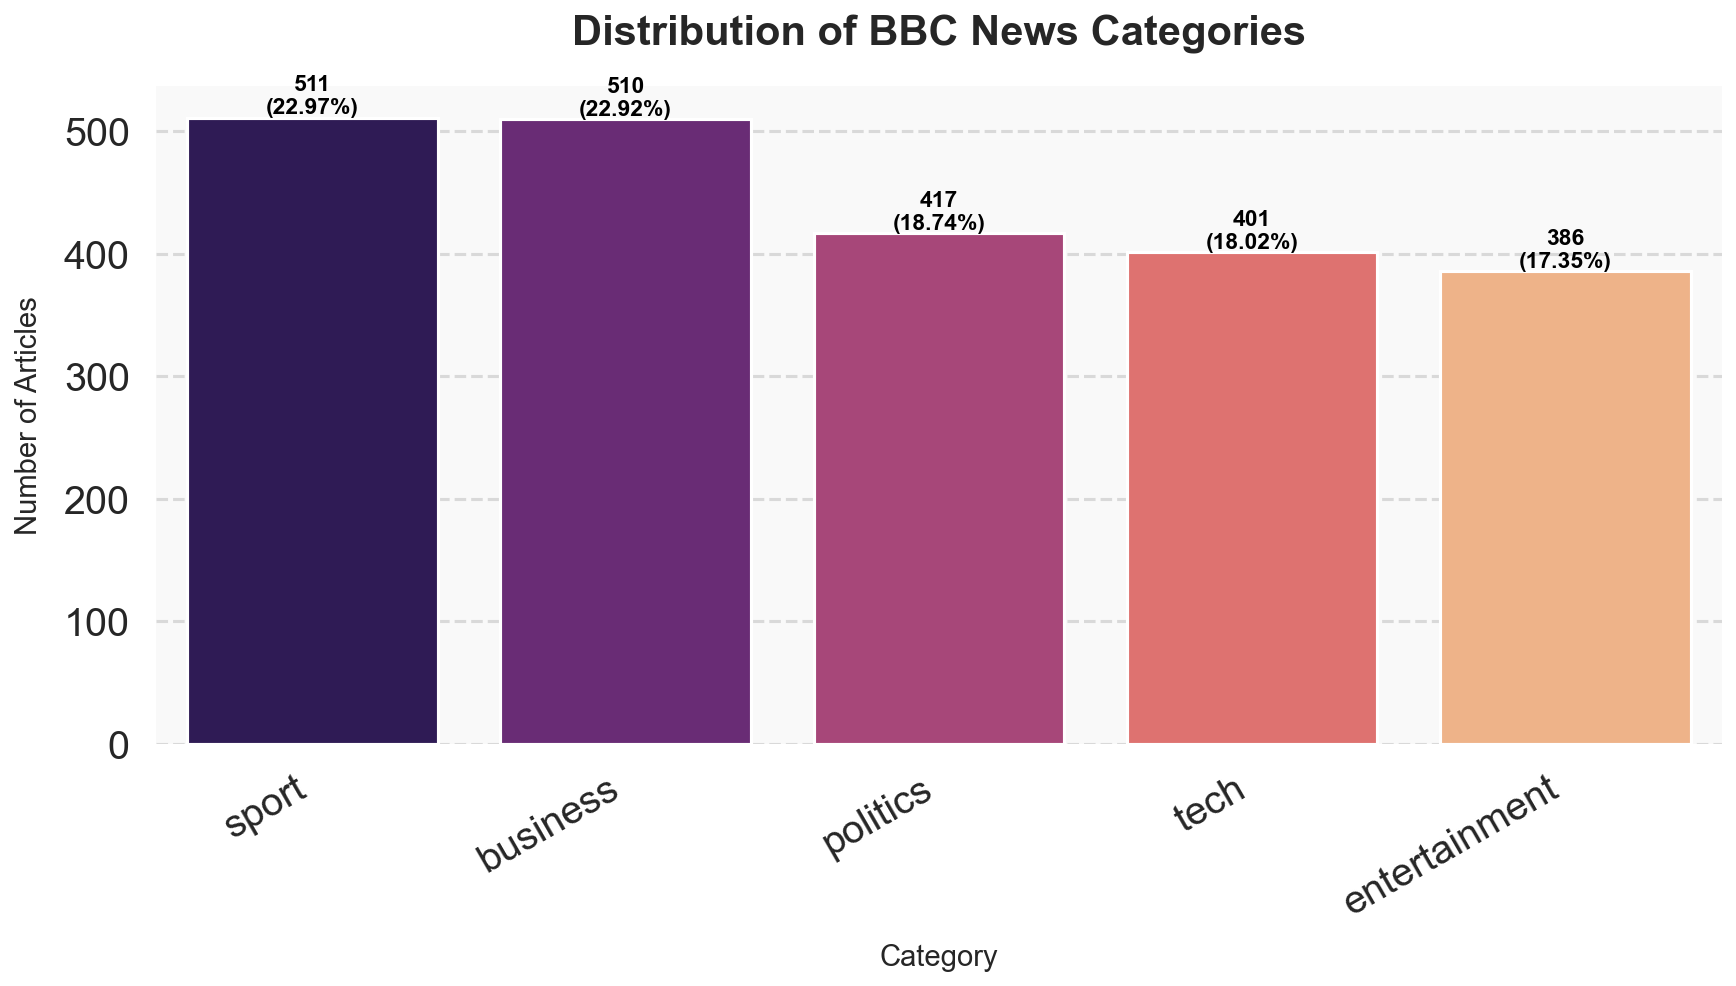

In [4]:
category_counts = df['category'].value_counts().sort_values(ascending=False)
category_percent = (category_counts / category_counts.sum() * 100).round(2)

sns.set_theme(style="whitegrid", context="talk", font_scale=1.15)

fig, ax = plt.subplots(figsize=(12, 7), dpi=150)

# Barplot without future warning
bars = sns.barplot(
    x=category_counts.index,
    y=category_counts.values,
    hue=category_counts.index,  # assign x values to hue
    palette=sns.color_palette("magma", n_colors=len(category_counts)),
    ax=ax,
    dodge=False,               # no separation for bars
    legend=False               # hide legend
)


for bar, pct in zip(bars.patches, category_percent):
    height = bar.get_height()
    ax.annotate(
        f"{int(height)}\n({pct}%)",
        xy=(bar.get_x() + bar.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=11, fontweight='bold', color='black'
    )

ax.set_title("Distribution of BBC News Categories", fontsize=20, fontweight='bold', pad=20)
ax.set_xlabel("Category", fontsize=14, labelpad=10)
ax.set_ylabel("Number of Articles", fontsize=14, labelpad=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.xticks(rotation=30, ha='right')
ax.set_facecolor("#f9f9f9")
plt.tight_layout()
plt.show()

In [5]:
# Compute text length (number of words)
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Advanced descriptive statistics
text_stats = df['text_length'].describe(percentiles=[0.25, 0.5, 0.75, 0.9]).round(2)
text_stats_df = text_stats.reset_index()
text_stats_df.columns = ['Statistic', 'Value']

# Display in tabular form
print("📊 Text Length Statistics (words):")
print(tabulate(text_stats_df, headers='keys', tablefmt='grid', showindex=False))


📊 Text Length Statistics (words):
+-------------+---------+
| Statistic   |   Value |
+=============+=========+
| count       | 2225    |
+-------------+---------+
| mean        |  390.3  |
+-------------+---------+
| std         |  241.75 |
+-------------+---------+
| min         |   90    |
+-------------+---------+
| 25%         |  250    |
+-------------+---------+
| 50%         |  337    |
+-------------+---------+
| 75%         |  479    |
+-------------+---------+
| 90%         |  629.2  |
+-------------+---------+
| max         | 4492    |
+-------------+---------+


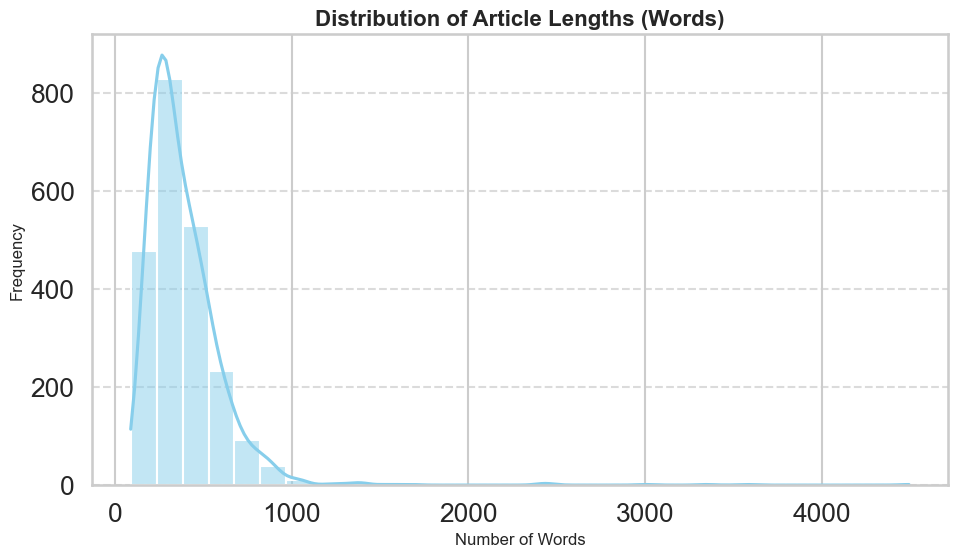

In [6]:
# Top 5 longest and shortest articles
top_longest = df[['text', 'text_length']].sort_values(by='text_length', ascending=False).head(5)
top_shortest = df[['text', 'text_length']].sort_values(by='text_length', ascending=True).head(5)


# Visualization: distribution of text lengths
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Article Lengths (Words)", fontsize=16, fontweight='bold')
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [7]:
# Optional: Top 5 longest and shortest articles in tables
top_longest = df[['text', 'text_length']].sort_values(by='text_length', ascending=False).head(5)
top_shortest = df[['text', 'text_length']].sort_values(by='text_length', ascending=True).head(5)


In [8]:
top_longest

,text,text_length
408,terror powers expose tyranny the lord chance...,4492
1615,scissor sisters triumph at brits us band sciss...,3570
677,minimum wage increased to £5.05 the minimum wa...,3345
482,losing yourself in online gaming online role p...,3007
880,roundabout continues nostalgia trip the new bi...,2448


In [9]:
top_shortest

,text,text_length
323,blunkett hints at election call ex-home secret...,90
2110,worcester v sale (fri) sixways friday 25 feb...,116
1883,tottenham bid &#163;8m for forest duo nottingh...,117
1319,hereford 1-1 doncaster hereford win 3-1 on pen...,125
91,solskjaer raises hopes of return manchester un...,126


In [10]:
max_len = 100  # max characters to show
examples = []
for label in df['category'].unique():
    example_text = df[df['category'] == label]['text'].iloc[0]
    if len(example_text) > max_len:
        example_text = example_text[:max_len] + "..."  # truncate and add ellipsis
    examples.append([label.upper(), example_text])

examples_df = pd.DataFrame(examples, columns=['Category', 'Example Headline'])

from tabulate import tabulate
print(tabulate(examples_df, headers='keys', tablefmt='grid', showindex=False))


+---------------+---------------------------------------------------------------------------------------------------------+
| Category      | Example Headline                                                                                        |
+===============+=========================================================================================================+
| TECH          | tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital... |
+---------------+---------------------------------------------------------------------------------------------------------+
| BUSINESS      | worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an... |
+---------------+---------------------------------------------------------------------------------------------------------+
| SPORT         | tigers wary of farrell  gamble  leicester say they will not be rushed into making a bid for andy far... |
+-------

# 1. Input the Raw Dataset

Read the CSV file safely and efficiently.

Extract the news article texts and their corresponding categories.

## Prepare two lists:

- sentences → containing all news articles.

- labels → containing all categories (labels).

    

In [11]:
# GRADED FUNCTION: parse_data_from_file

def parse_data_from_file(filename):
    """
    Extracts sentences and labels from a CSV file
    
    Args:
        filename (str): path to the CSV file
    
    Returns:
        (list[str], list[str]): tuple containing lists of sentences and labels
    """
    sentences = []
    labels = []

    ### START CODE HERE ###
    with open(filename, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            # CSV structure is: category, text (not sentence, label)
            labels.append(row[0])      # First column is category/label
            sentences.append(row[1])   # Second column is text/sentence
    ### END CODE HERE ###

    return sentences, labels

In [12]:
# Get sentences and labels using the robust parse function
sentences, labels = parse_data_from_file("bbc-text.csv")

# Compute text statistics
sentence_lengths = [len(s.split()) for s in sentences]
total_words = sum(sentence_lengths)
avg_words = sum(sentence_lengths) / len(sentence_lengths)
min_words = min(sentence_lengths)
max_words = max(sentence_lengths)
median_words = pd.Series(sentence_lengths).median()

# Label distribution
label_counts = pd.Series(labels).value_counts()

# Summary table
summary = [
    ["Total sentences", len(sentences)],
    ["Total labels", len(labels)],
    ["Total words", total_words],
    ["Average words per sentence", round(avg_words, 2)],
    ["Median words per sentence", median_words],
    ["Shortest sentence (words)", min_words],
    ["Longest sentence (words)", max_words],
    ["Unique labels", len(label_counts)],
]
print("📊 Dataset Summary:\n")
print(tabulate(summary, headers=["Metric", "Value"], tablefmt="grid"))


📊 Dataset Summary:

+----------------------------+----------+
| Metric                     |    Value |
+============================+==========+
| Total sentences            |   2225   |
+----------------------------+----------+
| Total labels               |   2225   |
+----------------------------+----------+
| Total words                | 868407   |
+----------------------------+----------+
| Average words per sentence |    390.3 |
+----------------------------+----------+
| Median words per sentence  |    337   |
+----------------------------+----------+
| Shortest sentence (words)  |     90   |
+----------------------------+----------+
| Longest sentence (words)   |   4492   |
+----------------------------+----------+
| Unique labels              |      5   |
+----------------------------+----------+


# Clean & Standardize Text (Exercise 2)

- Convert all text to lowercase (so “Football” and “football” are treated the same).

- Tokenize (split into words).

- Remove stopwords (like "the", "is", "and") that don’t help classification.

- Rejoin cleaned words back into sentences.

#### 👉 Your task: Implement text preprocessing using libraries like NLTK or TensorFlow text preprocessing utilities.

In [13]:
# List of stopwords
STOPWORDS = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [14]:
# GRADED FUNCTION: standardize_func

def standardize_func(sentence):
    """Standardizes sentences by converting to lower-case and removing stopwords.

    Args:
        sentence (str): Original sentence.

    Returns:
        str: Standardized sentence in lower-case and without stopwords.
    """
    
    ### START CODE HERE ###
    # Convert to lowercase
    sentence = sentence.lower()

    # Split into words
    words = sentence.split()

    # Remove stopwords
    filtered_words = [word for word in words if word not in STOPWORDS]

    # Rejoin words into a single string
    sentence = " ".join(filtered_words)
    ### END CODE HERE ###

    return sentence

In [15]:
# Example sentence standardization
test_sentence = "Hello! We're just about to see this function in action =)"
standardized_sentence = standardize_func(test_sentence)

print("═════════════════════════════════════════════════════")
print(" Demonstration of the Standardization Pipeline ")
print("═════════════════════════════════════════════════════\n")
print(f"Original Sentence:\n» {test_sentence}\n")
print(f"Standardized Sentence:\n» {standardized_sentence}\n")

# Apply standardization across the dataset
standard_sentences = [standardize_func(sentence) for sentence in sentences]

# Compute word counts before and after
original_counts = [len(s.split()) for s in sentences]
standard_counts = [len(s.split()) for s in standard_sentences]

# Create a summary table
summary_stats = pd.DataFrame({
    "Metric": ["Total Sentences", "Total Words", "Average Words per Sentence", 
               "Median Words per Sentence", "Shortest Sentence (words)", "Longest Sentence (words)"],
    "Before Standardization": [len(sentences), sum(original_counts), round(pd.Series(original_counts).mean(),2),
                               pd.Series(original_counts).median(), min(original_counts), max(original_counts)],
    "After Standardization": [len(standard_sentences), sum(standard_counts), round(pd.Series(standard_counts).mean(),2),
                              pd.Series(standard_counts).median(), min(standard_counts), max(standard_counts)]
})

print("═════════════════════════════════════════════════════")
print(" Quantitative Impact of Standardization on Dataset ")
print("═════════════════════════════════════════════════════\n")
print(tabulate(summary_stats, headers='keys', tablefmt='grid', showindex=False))


═════════════════════════════════════════════════════
 Demonstration of the Standardization Pipeline 
═════════════════════════════════════════════════════

Original Sentence:
» Hello! We're just about to see this function in action =)

Standardized Sentence:
» hello! just see function action =)

═════════════════════════════════════════════════════
 Quantitative Impact of Standardization on Dataset 
═════════════════════════════════════════════════════

+----------------------------+--------------------------+-------------------------+
| Metric                     |   Before Standardization |   After Standardization |
+============================+==========================+=========================+
| Total Sentences            |                   2225   |                 2225    |
+----------------------------+--------------------------+-------------------------+
| Total Words                |                 868407   |               523886    |
+----------------------------+-------

In [17]:
import textwrap

max_width = 60  # wrap text after 60 characters
wrapped_examples = []
for orig, std in zip(sentences[:5], standard_sentences[:5]):
    orig_wrap = "\n".join(textwrap.wrap(orig, width=max_width))
    std_wrap = "\n".join(textwrap.wrap(std, width=max_width))
    wrapped_examples.append([orig_wrap, std_wrap])

examples_df = pd.DataFrame(wrapped_examples, columns=["Original", "Standardized"])

print("\n📌 Sample Sentences Before and After Standardization (Wrapped Text):\n")
print(tabulate(examples_df, headers='keys', tablefmt='grid', showindex=False))



📌 Sample Sentences Before and After Standardization (Wrapped Text):

+--------------------------------------------------------------+--------------------------------------------------------------+
| Original                                                     | Standardized                                                 |
+==============================================================+==============================================================+
| tv future in the hands of viewers with home theatre systems  | tv future hands viewers home theatre systems plasma high-    |
| plasma high-definition tvs  and digital video recorders      | definition tvs digital video recorders moving living room    |
| moving into the living room  the way people watch tv will be | way people watch tv will radically different five years      |
| radically different in five years  time.  that is according  | time. according expert panel gathered annual consumer        |
| to an expert panel which gathere

# Vectorize Text (Exercise 3)

- Neural networks can’t understand words directly → convert them into numbers.

- Use tf.keras.layers.TextVectorization:

- Build a vocabulary of unique words.

- Map each word → unique integer.

- Convert sentences → sequences of integers.

- Pad all sequences to equal length.

### 👉 Your task: Create and adapt a TextVectorization layer on your dataset.

In [18]:
# GRADED FUNCTION: fit_vectorizer

def fit_vectorizer(sentences):
    """
    Instantiates the TextVectorization layer and adapts it to the sentences.
    
    Args:
        sentences (list[str]): lower-cased sentences without stopwords
    
    Returns:
        tf.keras.layers.TextVectorization: an instance of the TextVectorization layer adapted to the texts.
    """

    ### START CODE HERE ###
    # Instantiate the TextVectorization class with default parameters
    # Default output_sequence_length will be set to the max length found in data
    vectorizer = tf.keras.layers.TextVectorization()

    # Adapt to the sentences (learn vocabulary)
    vectorizer.adapt(sentences)
    ### END CODE HERE ###

    return vectorizer

In [19]:
# Create the vectorizer adapted to the standardized sentences
vectorizer = fit_vectorizer(standard_sentences)

# Get the vocabulary
vocabulary = vectorizer.get_vocabulary()

# Count total and unique tokens
total_tokens = len(vocabulary)
unk_in_vocab = "[UNK]" in vocabulary

# Optional: display top 10 most frequent tokens in the corpus
all_tokens = [token for sentence in standard_sentences for token in sentence.split()]
token_freq = Counter(all_tokens).most_common(10)
token_freq_df = pd.DataFrame(token_freq, columns=["Token", "Frequency"])

# Summary table for vocabulary
summary_df = pd.DataFrame([
    ["Total Vocabulary Size", total_tokens],
    ["[UNK] token present", "Yes" if unk_in_vocab else "No"]
], columns=["Metric", "Value"])

print("═════════════════════════════════════════════════════")
print(" Vocabulary Overview ")
print("═════════════════════════════════════════════════════\n")
print(tabulate(summary_df, headers='keys', tablefmt='grid', showindex=False))

print("\n📌 Top 10 Most Frequent Tokens in the Corpus:\n")
print(tabulate(token_freq_df, headers='keys', tablefmt='grid', showindex=False))

print("\nNote: The vocabulary includes unique tokens extracted from standardized sentences.")
print("      Frequent tokens provide insight into common language patterns, while the presence")
print("      or absence of [UNK] token indicates handling of out-of-vocabulary words in downstream NLP tasks.")


═════════════════════════════════════════════════════
 Vocabulary Overview 
═════════════════════════════════════════════════════

+-----------------------+---------+
| Metric                | Value   |
+=======================+=========+
| Total Vocabulary Size | 33088   |
+-----------------------+---------+
| [UNK] token present   | Yes     |
+-----------------------+---------+

📌 Top 10 Most Frequent Tokens in the Corpus:

+---------+-------------+
| Token   |   Frequency |
+=========+=============+
| s       |        9007 |
+---------+-------------+
| said    |        5072 |
+---------+-------------+
| will    |        4459 |
+---------+-------------+
| not     |        3442 |
+---------+-------------+
| -       |        3195 |
+---------+-------------+
| mr      |        2992 |
+---------+-------------+
| also    |        2154 |
+---------+-------------+
| people  |        1970 |
+---------+-------------+
| new     |        1957 |
+---------+-------------+
| us      |        1786 

In [61]:
# Convert padded_sequences to NumPy array if it is a TensorFlow tensor
padded_sequences_np = padded_sequences.numpy() if hasattr(padded_sequences, "numpy") else np.array(padded_sequences)

# Compute tensor statistics
num_sequences = padded_sequences_np.shape[0]
sequence_length = padded_sequences_np.shape[1]
min_val = np.min(padded_sequences_np)
max_val = np.max(padded_sequences_np)
mean_val = np.mean(padded_sequences_np)

# Summary table for tensor info
summary_df = [
    ["Total sequences", num_sequences],
    ["Sequence length (after padding)", sequence_length],
    ["Minimum token ID", min_val],
    ["Maximum token ID", max_val],
    ["Mean token ID", round(mean_val, 2)]
]

print("═════════════════════════════════════════════════════")
print(" Vectorization and Padding Overview ")
print("═════════════════════════════════════════════════════\n")
print(tabulate(summary_df, headers=["Metric", "Value"], tablefmt="grid"))

# Display the first padded sequence in a compact, readable format
first_seq = padded_sequences_np[0]

# Keep first 20 tokens, ellipsis placeholder, and last 20 tokens
display_tokens = np.concatenate([first_seq[:20], [-1], first_seq[-20:]])
token_labels = [f"t{i+1}" for i in range(20)] + ["..."] + [f"t{sequence_length-19+i}" for i in range(20)]

first_seq_df = pd.DataFrame([display_tokens], columns=token_labels)

# Replace -1 with "..." for display
first_seq_df.replace(-1, "...", inplace=True)

print("\n📌 First Padded Sequence (token IDs, truncated with '...' for skipped tokens):\n")
print(tabulate(first_seq_df, headers='keys', tablefmt='grid', showindex=False))

print("\nNote: Only the first and last 20 token IDs are displayed to ensure readability.")
print("      Each sequence is padded to a uniform length for consistent input to neural networks.")
print("      Padding tokens (zeros) allow batch processing while preserving token positions,")
print("      which is essential for RNNs, LSTMs, and Transformer-based NLP models.")


═════════════════════════════════════════════════════
 Vectorization and Padding Overview 
═════════════════════════════════════════════════════

+---------------------------------+----------+
| Metric                          |    Value |
+=================================+==========+
| Total sequences                 |  2225    |
+---------------------------------+----------+
| Sequence length (after padding) |  2418    |
+---------------------------------+----------+
| Minimum token ID                |     0    |
+---------------------------------+----------+
| Maximum token ID                | 33087    |
+---------------------------------+----------+
| Mean token ID                   |   286.33 |
+---------------------------------+----------+

📌 First Padded Sequence (token IDs, truncated with '...' for skipped tokens):

+------+------+------+------+------+------+------+------+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+---

# Encode Labels
   - Convert categorical labels into numeric values.

In [20]:
# GRADED FUNCTION: fit_label_encoder

def fit_label_encoder(labels):
    """
    Tokenizes the labels
    
    Args:
        labels (list[str]): labels to tokenize
    
    Returns:
        tf.keras.layers.StringLookup: adapted encoder for labels
    """
    ### START CODE HERE ###
    # Instantiate the StringLookup layer with no OOV token for labels
    label_encoder = tf.keras.layers.StringLookup(num_oov_indices=0)

    # Adapt the layer to the given labels
    label_encoder.adapt(labels)
    ### END CODE HERE ###
    
    return label_encoder

In [21]:
# Adapt the encoder to the categorical labels
label_encoder = fit_label_encoder(labels)

# Retrieve the vocabulary for interpretability and reproducibility
vocabulary = label_encoder.get_vocabulary()

# Encode the labels into integer sequences suitable for model input
label_sequences = label_encoder(labels)

# Display detailed insights for debugging and analysis
print(f"[INFO] Label vocabulary ({len(vocabulary)} classes): {vocabulary}\n")
print(f"[INFO] Sample raw labels (first 10): {labels[:10]}\n")
print(f"[INFO] Corresponding encoded sequences (first 10): {label_sequences[:10]}\n")


[INFO] Label vocabulary (5 classes): [np.str_('sport'), np.str_('business'), np.str_('politics'), np.str_('tech'), np.str_('entertainment')]

[INFO] Sample raw labels (first 10): ['tech', 'business', 'sport', 'sport', 'entertainment', 'politics', 'politics', 'sport', 'sport', 'entertainment']

[INFO] Corresponding encoded sequences (first 10): [3 1 0 0 4 2 2 0 0 4]



In [27]:
from typing import List, Tuple
from collections import Counter

def build_word_vocabulary(sentences: List[str]) -> Tuple[List[str], Counter]:
    """
    Builds a standardized word-level vocabulary from a list of sentences.
    
    Steps:
      1. Standardize sentences (lowercase, remove stopwords, punctuation, etc.)
      2. Split sentences into individual words
      3. Collect all unique words to form the vocabulary
      4. Count word frequencies for analysis
    
    Args:
        sentences (List[str]): Raw sentences from the dataset.
    
    Returns:
        Tuple[List[str], Counter]: 
            - Sorted list of unique words (vocabulary)
            - Counter object containing word frequencies
    """
    
    # Step 1: Standardize all sentences using your pre-defined function
    standardized_sentences = [standardize_func(sentence) for sentence in sentences]

    # Step 2: Split sentences into words and collect all words
    all_words = [word for sentence in standardized_sentences for word in sentence.split()]

    # Step 3: Get unique vocabulary
    word_vocabulary = sorted(set(all_words))

    # Step 4: Count word frequencies
    word_counts = Counter(all_words)

    # Step 5: Logging for analysis
    print(f"[INFO] Total unique words in the dataset: {len(word_vocabulary)}")
    print(f"[INFO] Sample vocabulary (first 50 words): {word_vocabulary[:50]}")
    print(f"[INFO] Most common words: {word_counts.most_common(10)}")

    return word_vocabulary, word_counts


# Usage example
word_vocabulary, word_counts = build_word_vocabulary(sentences)


[INFO] Total unique words in the dataset: 43652
[INFO] Sample vocabulary (first 50 words): ['!', '$$$.', '$0.98)', '$0.99', '$1', '$1.07bn', '$1.13bn', '$1.15', '$1.1bn', '$1.1m', '$1.20', '$1.25', '$1.26', '$1.2871', '$1.29', '$1.2944', '$1.2974', '$1.2bn', '$1.2bn-worth', '$1.3', '$1.30', '$1.30.', '$1.3006', '$1.32', '$1.3218', '$1.3270', '$1.3280', '$1.32bn)', '$1.33', '$1.35', '$1.3509.', '$1.3516', '$1.354', '$1.3636.', '$1.364', '$1.3652', '$1.3666', '$1.3667', '$1.3bn', '$1.3bn)', '$1.40', '$1.48', '$1.4850', '$1.4bn', '$1.50', '$1.52', '$1.5bn', '$1.5m', '$1.62', '$1.64']
[INFO] Most common words: [('s', 9007), ('said', 5072), ('will', 4459), ('not', 3442), ('-', 3195), ('mr', 2992), ('also', 2154), ('people', 1970), ('new', 1957), ('us', 1786)]


In [29]:
# Suppose all_words is already prepared from your standardized sentences
# Step 1: Count word frequencies
word_counts = Counter(all_words)

# Step 2: Convert to a DataFrame
df_vocab = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Step 3: Sort by frequency (descending)
df_vocab = df_vocab.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Step 4: Add a rank column
df_vocab['Rank'] = df_vocab.index + 1

# Step 5: Display top 50 words for readability
print(df_vocab.head(43652).to_string(index=False))

                            Word  Frequency  Rank
                               s       9007     1
                            said       5072     2
                            will       4459     3
                             not       3442     4
                               -       3195     5
                              mr       2992     6
                            also       2154     7
                          people       1970     8
                             new       1957     9
                              us       1786    10
                             one       1705    11
                             can       1656    12
                           said.       1499    13
                            year       1396    14
                            last       1380    15
                           first       1277    16
                               t       1269    17
                               .       1171    18
                             two       1161    19
